## Machine Learning Avanzado

### Proyecto Final: Adquisición de producto bancario a partir de datos de marketing telefónico

Profesor:
Joaquin Villagra
__________


#### **Problema**
Durante el desarrollo del siguiente proyecto se utilizará un dataset de origen público el cual se encuentra publicado en el repositorio de la Universidad de California sede Irvine **(UCI)** y además utilizado en diferentes actividades del sitio web **Kaggle**. El mismo corresponde a la data obtenida por los resultados de una **campaña de marketing telefónico** realizada por una institución bancaria de Portugal.

El principal objetivo de los modelos a implementar es poder predecir la compra o no del producto único ofrecido (Depósito a plazo fijo) durante esta estrategia de marketing. Por lo tanto, el problema es de tipo **Clasificación** binaria. Es decir, sólo hay dos tipos de respuesta: Positiva o Negativa. Se abordarán diferentes modelos de Machine Learning avanzado para lograr la solución más óptima al proyecto.



##### **Descripción de variables y dataset**

Esta data contiene un total de **20** variables independientes más la variable target *y*. Estos 20 atributos se pueden agrupar en tres distintos tópicos para hacer mejor su análisis.

**Datos del cliente**

* Age: Edad
* Job : Tipo de trabajo
* Marital : Estado Civil
* Education : Nivel educativo alcanzado
* Default: ¿Tiene un incumplimiento crediticio?
* Housing: ¿El cliente posee un crédito hipotecario?
* Loan: ¿El cliente posee un crédito personal?

**Datos propios de la campaña y departamento de Marketing**

* Contact: Tipo de línea de contacto
* Month: Mes de contacto 
* Dayofweek: Día de contacto
* Duration: Duración de la llamada en segundos
* Campaign: Número de veces contactado durante la actual campaña
* Pdays: Cantidad de días que lleva el cliente sin ser contactado (fuera de la campaña actual)
* Previous: Número de veces que ha sido contactado el cliente fuera de la campaña. 
* Poutcome: Resultado/respuesta del cliente durante la campaña anterior

**Contexto socioeconómico del país**

* Emp.var.rate: Variación de la tasa de empleo
* Cons.price.idx: Índice de Precio al Consumidor
* Cons.conf.idx: Índice de confianza del consumidor
* Euribor3m:  Euro Interbank Offered Rate promediado de los últimos tres meses
* Nr.employed: Indicador de Número de empleados en el país




#### **Bibliotecas a utilizar para el desarrollo del proyecto**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from numpy.random import seed
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
sns.reset_defaults()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Se* carga el **dataset** a utilizar para la aplicación de los modelos de Machine Learning.

In [2]:
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/MLA/bank_marketing.csv',sep=';')
df

Mounted at /content/drive/


age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]

#### **Preprocesamiento y análisis exploratorio**

Como primer acercamiento se ejecutará el método *.info* para comprobar los tipos de variables que contiene cada columna y si existen valores nulos dentro de ellas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Se pueden identificar directamente variables de valores enteros y float. Aun así existen otros Dtypes de tipo objeto, por lo que se tendrá que explorar el valor de dichas variables para poder discernir el cómo tratarlas. Adicionalmente se puede observar que no existe ningún valor nulo, esto debido a que es un dataset publicado y tratado previamente.

Una de las advertencias del dataset señaladas desde la fuente de obtención tiene que ver con la presencia de algunos datos duplicados. Es por ello que se procede a comprobar la cantidad y a eliminarlos del dataset.

In [ ]:
# Cantidad de filas del dataset sin duplicados
print('Total de filas únicas: ' + str(len(df.drop_duplicates())))

Total de filas únicas: 41176


Se evidencia que existen un total de 12 filas duplicadas. Se elimina y se hace un reset de los índices.

In [3]:
df = df.drop_duplicates().reset_index(drop=True)
df

age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41171   73      retired  married  ...     1.028      4963.6  yes
41172   46  blue-collar  married  ...     1.028      4963.6   no
41173   56      retired  married  ...     1.028      4963.6   no
41174   44   technician  married  ...     1.028      4963.6  yes
41175   74      retired  married  ...     1.028      4963.6   no

[41176 rows x 21 columns]

#### **Comprobando desbalance del dataset**

Al provenir estos datos de resultados de campañas de marketing telefónico para la venta de un producto bancario, es completamente esperable un desbalance en la variable a predecir. Un número muy superior de respuestas negativas sobre positivas es lo común en estos datasets. A continuación se procede a comprobar si existe este **desbalance**


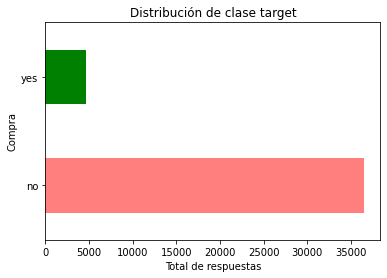

In [ ]:
# Gráfica de la distrobución de la variable a predecir
ax = df.groupby('y').count()["age"].plot(kind="barh", color=['#ff7f7f','green'])

ax.set_ylabel('Compra')
ax.set_xlabel('Total de respuestas')
ax.title.set_text('Distribución de clase target')
plt.show()

In [ ]:
df.y.value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

Tal como se tenía previsto, la cantidad de respuestas negativas **(88%)** supera de manera significativa a las positivas **(11%)**. Este **marcado desbalance** será tratado con precaución al entrenar los modelos a utilizar, para ello se utilizará la técnica **SMOTE** (Synthetic Minority Oversampling Technique)

#### **Análisis exploratorio**

Se comenzará el análisis exploratorio revisando el comportamiento según diferentes **edades**. Se dividió el dataset en 8 grupos etarios para un análisis mucho más limpio.

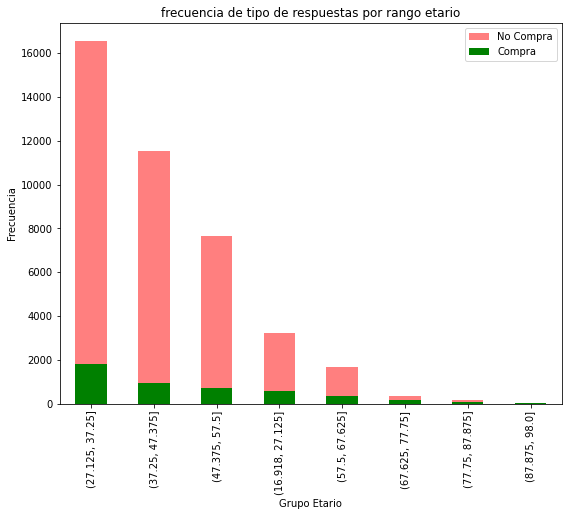

In [ ]:
# Gráfica para 8 bins o grupos de edades
ax = df["age"].value_counts(bins=8).plot(kind='bar', figsize=(9,7), color='#ff7f7f')
df[df["y"]=='yes']["age"].value_counts(bins=8).plot(kind='bar', ax = ax, color= 'green')

ax.set_xlabel('Grupo Etario')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('frecuencia de tipo de respuestas por rango etario')
plt.show()

Claramente se puede apreciar que la mayoría de los clientes involucrados en esta campaña de marketing tienen edades entre los 27 y 47 años (los dos grupos de mayor frecuencia). Sin embargo, este gráfico no permite distinguir adecuadamente si existe una tendencia de adquisición del producto según las edades, por lo que se realizará un gráfico para comprobar el porcentaje de adquisición por cada uno de estos 8 grupos.

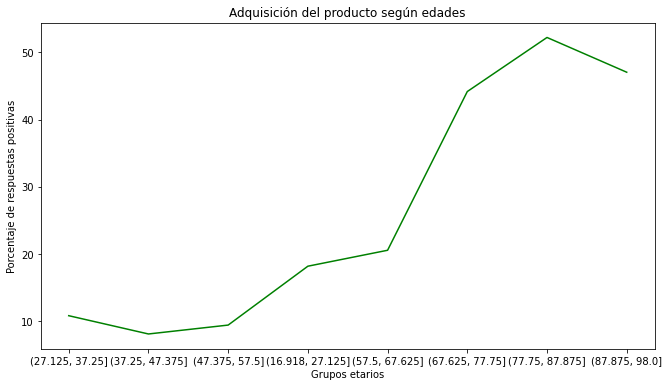

In [ ]:
ax = (df[df["y"]=='yes']["age"].value_counts(bins=8).round(0) * 100 / df["age"].value_counts(bins=8).round(0) ).plot(kind='line',
                                                                                                     figsize=(11,6),
                                                                                                   color='green')
ax.set_xlabel('Grupos etarios')
ax.set_ylabel('Porcentaje de respuestas positivas')
ax.title.set_text('Adquisición del producto según edades')
plt.show()

Se aprecia de manera clara como los clientes de edades avanzadas (mayores a 67 años) son más propensos a contratar el producto ofrecido. Además, se aprecia como el grupo más joven (hasta 27 años) alcanza un porcentaje de adquisición relativamente alto que se encuentra cercano al 20%.

El próximo item a evaluar es el relacionado al **nivel educativo** del cliente.

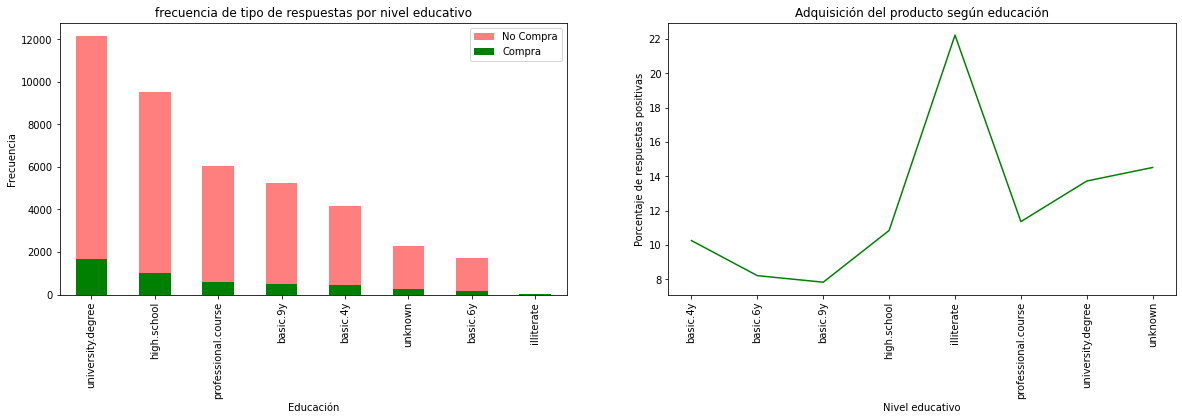

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
# Gráfico de adquisición por nivel educativo
ax = axs[0]

df["education"].value_counts().plot(kind='bar', color='#ff7f7f',ax=ax)
df[df["y"]=='yes']["education"].value_counts().plot(kind='bar', ax = ax, color= 'green')

ax.set_xlabel('Educación')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('frecuencia de tipo de respuestas por nivel educativo')

ax = axs[1]
(df[df["y"]=='yes']["education"].value_counts() * 100 / df["education"].value_counts() ).plot(kind='line',color = 'green',ax=ax)
ax.set_xlabel('Nivel educativo')
ax.set_ylabel('Porcentaje de respuestas positivas')
ax.title.set_text('Adquisición del producto según educación')
ax.tick_params(axis='x',labelrotation=90)
plt.show()

Se puede notar claramente como la población sin ningún tipo de educación compra el producto ofrecido con mayor frecuencia. Sin embargo, tal como puede apreciar en el grafico de barras de la izquierda, estos no representan un número significativo dentro del público al cual fue lanzada esta campaña.

Seguidamente, se evaluará el comportamiento dentro de la variable **Estado Civil** 

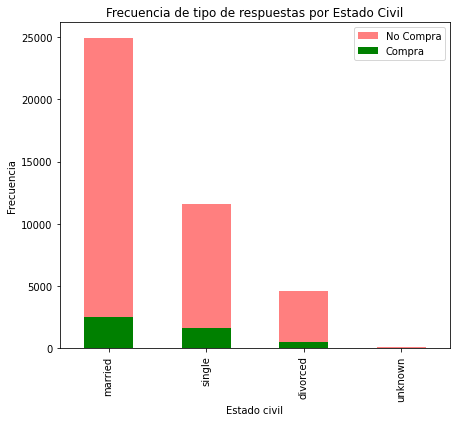

In [ ]:
ax = df["marital"].value_counts().plot(kind='bar', figsize=(7,6), color='#ff7f7f')
df[df["y"]=='yes']["marital"].value_counts().plot(kind='bar', ax = ax, color= 'green')

ax.set_xlabel('Estado civil')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('Frecuencia de tipo de respuestas por Estado Civil')
plt.show()

No se observa **ninguna tendencia** significativa en la aceptación de compra. Además, se evidencia que existen filas con valor desconocido aunque estas no representan un número importante.

Ahora se revisarán las variables que se relacionan mucho más con la campaña y estrategia de comunicación que con el cliente en si mismo. La primera en evaluar será el tipo de **línea telefónica** a la cual se llama el equipo de CRM de la empresa.

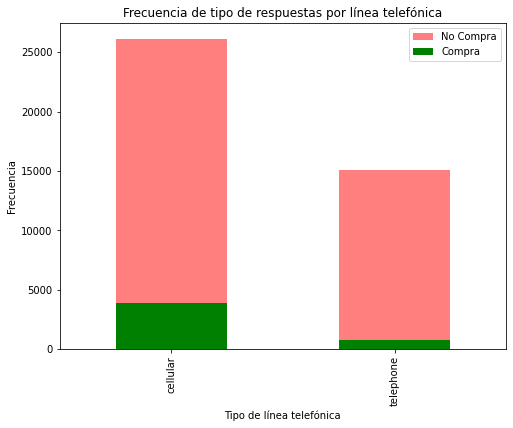

In [ ]:
ax = df["contact"].value_counts().plot(kind='bar', figsize=(8,6), color='#ff7f7f')
df[df["y"]=='yes']["contact"].value_counts().plot(kind='bar', ax = ax, color= 'green')

ax.set_xlabel('Tipo de línea telefónica')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('Frecuencia de tipo de respuestas por línea telefónica')
plt.show()

Existe un mayor número de personas contactadas mediante celulares lo cual es esperable en la actualidad. Además, estas personas, tal como se ve en la visualización, presentan una mayor proporción de compra del producto.

Se revisará el comportamiento de los clientes respecto a los **meses** que fueron contactados

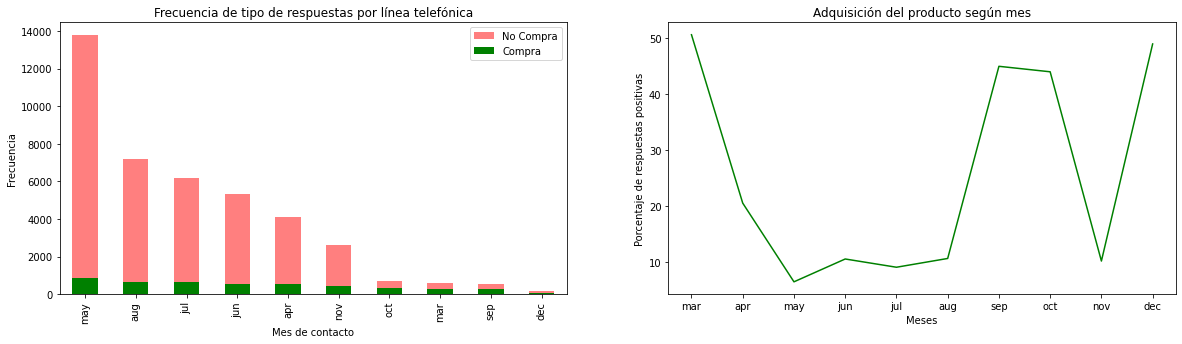

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
# Gráfico de adquisición por nivel educativo
ax = axs[0]
df["month"].value_counts().plot(kind='bar', color='#ff7f7f',ax=ax)
df[df["y"]=='yes']["month"].value_counts().plot(kind='bar', ax = ax, color= 'green')
ax.set_xlabel('Mes de contacto')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('Frecuencia de tipo de respuestas por línea telefónica')

ax = axs[1]
month_order = ["mar", "apr", "may", "jun", "jul", "aug", "sep","oct","nov","dec"]
(df[df["y"]=='yes']["month"].value_counts()* 100 / df["month"].value_counts() )[month_order].plot(kind='line', color= 'green',ax=ax)
ax.set_xlabel('Meses')
ax.set_ylabel('Porcentaje de respuestas positivas')
ax.title.set_text('Adquisición del producto según mes')
ax.set_xticks([*range(0,len(month_order))])
ax.set_xticklabels(["mar", "apr", "may", "jun", "jul", "aug", "sep","oct","nov","dec"])
plt.show()

La campaña fue estructurada desde marzo a diciembre. Fue el mes de mayo durante el cual se contactó mayor número de personas. Este número casi duplica al segundo mes de mayor contactos. Se comprobará ahora en cuál de estos meses hubo un mayor porcentaje de respuestas positivas de compra.

Claramente existen meses donde el porcentaje de compra fue **mucho mayor** que el resto. Los meses de **marzo, septiembre, octubre y diciembre** oscilaron alrededor del 50% de compra. Sin embargo, también es cierto que estos meses fueron los de menor número de contactos totales.

Se explorará la variable **duración de la llamada**. Se dividirá la duración en segundos en 12 grupos para una visualización clara.

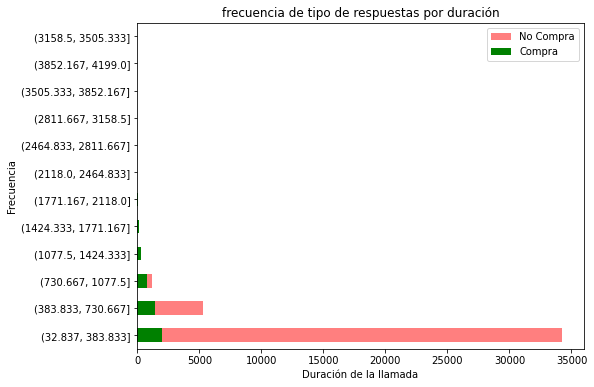

In [ ]:
# Gráfico de duración de la llamada
ax = df["duration"].value_counts(bins=12).plot(kind='barh', figsize=(8,6), color='#ff7f7f')
df[df["y"]=='yes']["duration"].value_counts(bins=12).plot(kind='barh', ax = ax, color= 'green')

ax.set_xlabel('Duración de la llamada')
ax.set_ylabel('Frecuencia')
ax.legend(['No Compra','Compra'])
ax.title.set_text('frecuencia de tipo de respuestas por duración')

plt.show()

Se ve de manera muy clara como el porcentaje de aceptación de compra aumenta junto con la duración. Esto era esperable ya que llamadas de pocos segundos suelen ser rechazos del servicio ofrecido. 

Además, debido a que esta variable realmente se obtiene luego de haber realizado el contacto, probablemente **se dejará de lado** en la construcción de los modelos.

Por último, se comprobará si existe una tendencia de compra según si el cliente había sido **contactado previamente** fuera de la actual campaña. Esto puede ser muy útil para la empresa ya que está muy relacionado a la fidelización y retención del cliente.


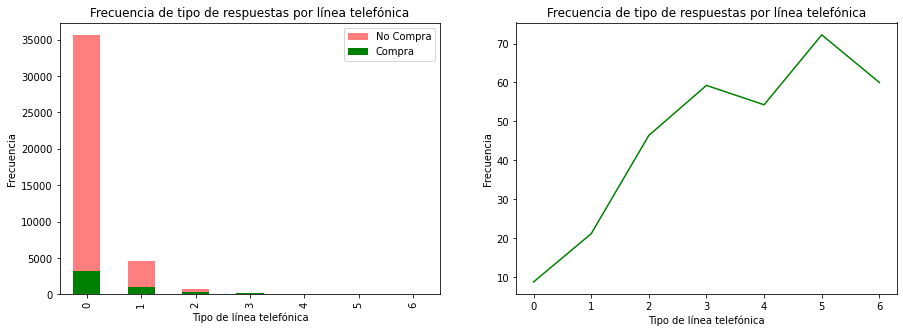

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

ax = df["previous"].value_counts().plot(kind='bar', color='#ff7f7f',ax = axs[0])
df[df["y"]=='yes']["previous"].value_counts().plot(kind='bar', ax = ax, color= 'green')

ax = (df[df["y"]=='yes']["previous"].value_counts()* 100/df["previous"].value_counts() ).plot(kind='line',
                                                                                              ax = axs[1], color='green')

axs[0].set_xlabel('Tipo de línea telefónica')
axs[0].set_ylabel('Frecuencia')
axs[0].legend(['No Compra','Compra'])
axs[0].title.set_text('Frecuencia de tipo de respuestas por línea telefónica')

axs[1].set_xlabel('Tipo de línea telefónica')
axs[1].set_ylabel('Frecuencia')
axs[1].title.set_text('Frecuencia de tipo de respuestas por línea telefónica')
plt.show()

El gráfico del lado derecho evidencia cómo la frecuencia de compra aumenta de manera pronunciada si el cliente había sido contactado por el banco más de una vez. Desafortunadamente y como se detalla en el gráfico de la izquierda, la gran mayoría de los casos del dataset no fueron contactados anteriormente. Esto puede ser una alarma para el departamento de CRM de la compañía.

#### **Visualizaciones exploratorias**

A continuación, se evaluará y explorará gráficamente si existen variables que influyen de manera crucial en el target *Y*. De igual forma, la importancia de features sobre la clasificación de Compra/No Compra se revisará junto con su posible incidencia en la aplicación de los modelos.

1) Se procede a representar el dataset en el **gráfico de coordenadas paralelas** para explorar si alguna variable puede ser determinante en la predicción del modelo.

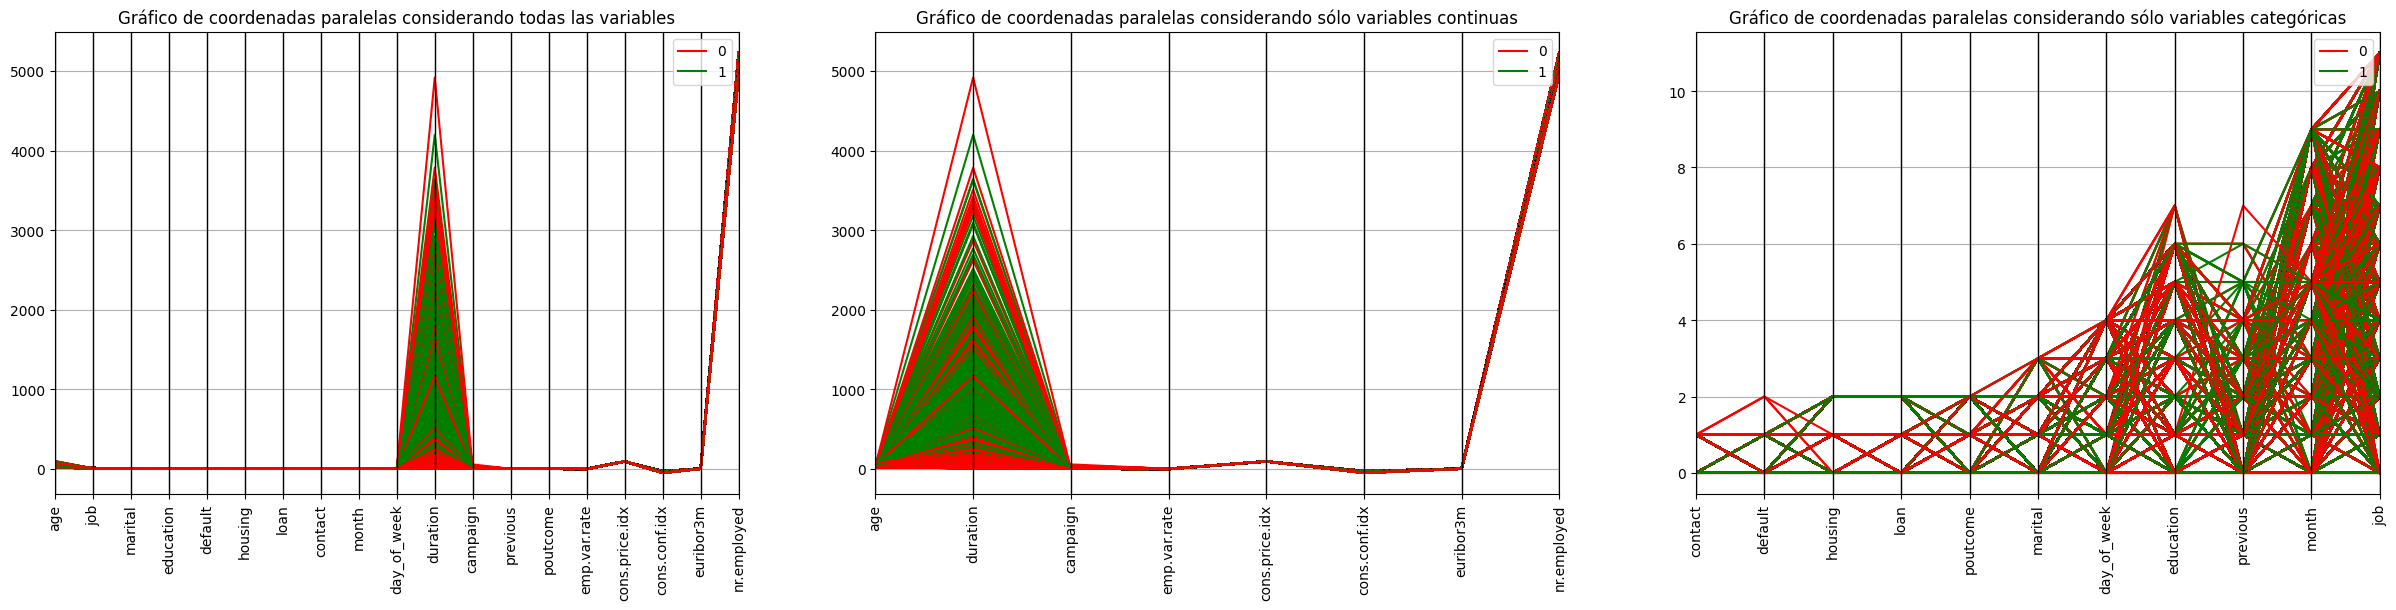

In [ ]:
#Representación de Gráfico de coordenadas paralelas para todas las variables, continuas y categóricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (30,6))
fig.subplots_adjust(hspace=0.3)
axes = axes.flatten()
ax = axes[0]
ax.set_title("Gráfico de coordenadas paralelas considerando todas las variables")
parallel_coordinates(df_mapped, "y", color = ['red', 'green'],ax=ax)
ax.tick_params(axis='x',labelrotation=90)
ax = axes[1]
ax.set_title("Gráfico de coordenadas paralelas considerando sólo variables continuas")
parallel_coordinates(df_mapped.drop(['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job'],axis=1), "y", color = ['red', 'green'],ax=ax)
ax.tick_params(axis='x',labelrotation=90)
ax = axes[2]
ax.set_title("Gráfico de coordenadas paralelas considerando sólo variables categóricas")
parallel_coordinates(df_mapped[['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job','y']], "y", color = ['red', 'green'],ax=ax)
ax.tick_params(axis='x',labelrotation=90)

Tal como se puede ver en la figura, y más específicamente en el gráfico de las variables continuas, la **variable duración** no sólo puede llegar a presentar valores con gran oscilación (segundos) sino que se evidencia una tendencia muy clara de compras aceptadas proporcional a la duración de la llamada. 

Incluso si se observa en los valores entre 500s y 2000s la presencia de lineas rojas es muy escasa aún cuando ya se sabe que se trata de un dataset severamente desbalanceado hacia las respuestas negativas. 

Por otro lado, en las **variables categóricas** se hace más complicado visualizar una tendencia clara. En el caso de los meses se observa una ligera tendencia en el mes etiquetado como *9* (noviembre) con un gran número de compras concretadas, esta tendencia temporal ya fue revisada y comprobada de manera detallada en el análisis exploratorio.

2) Representación de **Heatmap** del dataset:

  a) Se utilizará Heatmap con correlación de Pearson para obtener una vista previa de correlación entre todas las variables

  b) Se empleará correlación de Pearson para verificar correlación entre las variables continuas, se incluye además la variable "y".

  c) Se aplicará correlación de Spearman para verificar correlación entre las variables categóricas, se incluye además la variable "y".

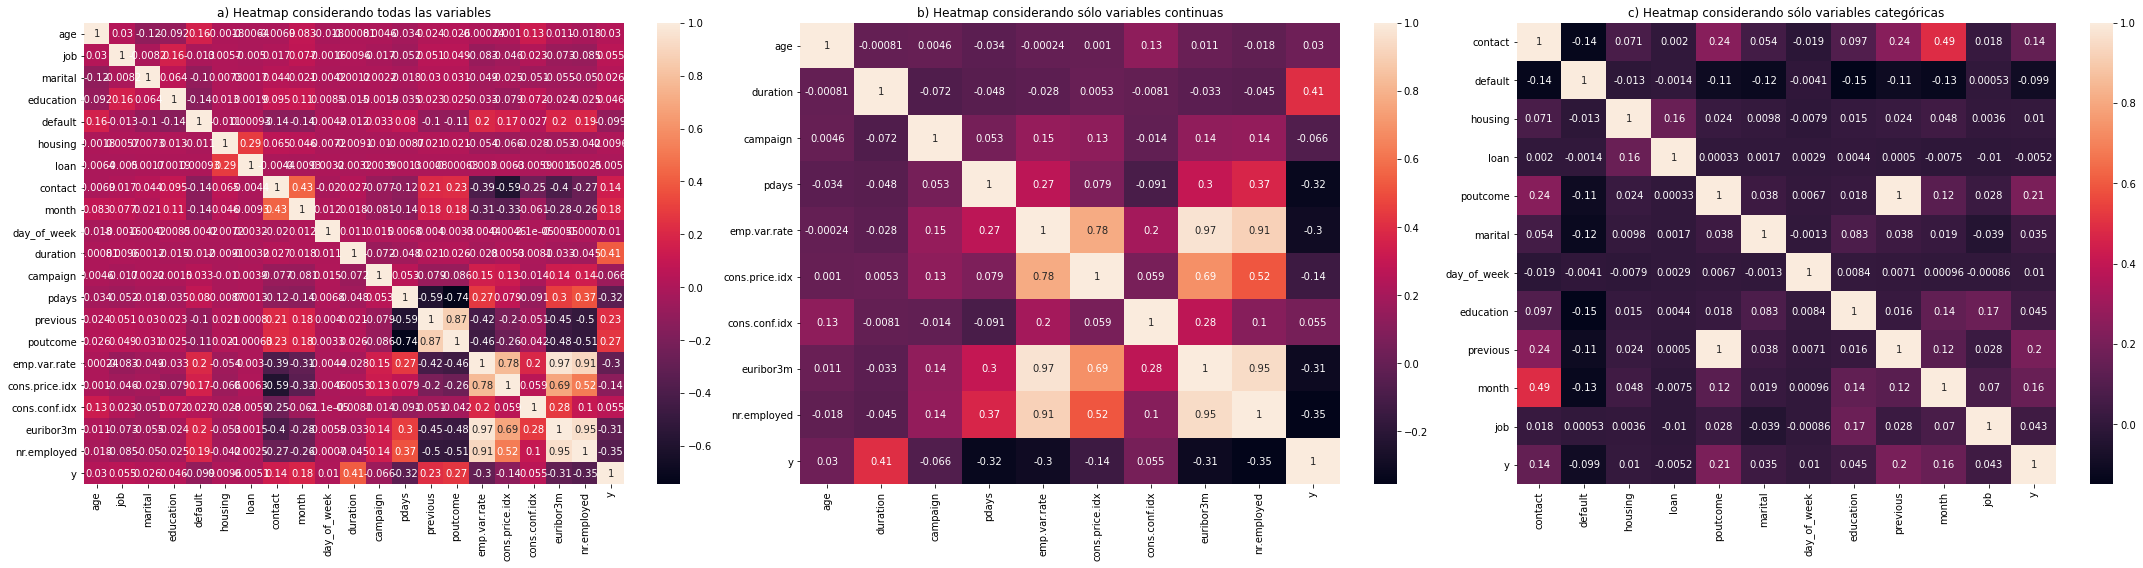

In [ ]:
#Mapping de columnas categóricas a valores numéricos para poder observar heatmaps y correlaciones
df_mapped = df.copy()
columns_to_map = ['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job','y']

for j in columns_to_map:
    dicts = {}
    keys = pd.factorize(df_mapped[j].unique())[1]
    values = pd.factorize(df_mapped[j].unique())[0]
    for i in values:
        dicts[keys[i]] = values[i]
    
    df_mapped[j] = df_mapped[j].map(dicts)

#Representación de Heatmap todas las variables, continuas y categóricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (30,7))
fig.tight_layout()
axes = axes.flatten()
ax = axes[0]
ax.set_title("a) Heatmap considerando todas las variables")
corrMatrix_all = df_mapped.corr('pearson')
sns.heatmap(corrMatrix_all, annot=True, ax=ax)
ax = axes[1]
ax.set_title("b) Heatmap considerando sólo variables continuas")
corrMatrix_cont = df_mapped.drop(['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job'],axis=1).corr('pearson')
sns.heatmap(corrMatrix_cont, annot=True, ax=ax)
ax = axes[2]
ax.set_title("c) Heatmap considerando sólo variables categóricas")
corrMatrix_cat = df_mapped[['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job','y']].corr('spearman')
sns.heatmap(corrMatrix_cat, annot=True, ax=ax)

En estas tres visualizaciones presentadas se comprobó que debido al gran número de variables que cuenta el dataset conviene presentarlas en dos diferentes heatmaps.

**Variables Categóricas**

* No se observa ninguna correlación alta de la variable a predecir con el resto. Los valores máximos alcanzados no superan una correlación mayor al 0.22, por lo que a esta altura se pronostica estar en frente de un problema que requiera modelos acondicionados de manera correcta y con resultados que pueden no llegar a alcanzar altas métricas. Las dos variables categóricas que superan el valor de 0.2 son *poutcome* y *previous*, las cuales además están estrechamente relacionadas ya que indican el tipo respuesta y el número de veces que fue contactado el cliente en campañas anteriores respectivamente.

**Variables Continuas**

* Se observan correlaciones ligeramente superiores con respecto al caso de las variables categóricas. Se destaca la variable *duration* con una correlación de más de 0.4. Sin embargo, y tal como se observó anteriormente dicha variable en el presente caso de estudio corresponde a una **variable posterior** a la acción de marketing directo (llamada telefónica) realizada. Por esas razones se procede a considerar su **eliminación o estudio paralelo** de los modelos con y sin la presencia de la misma. Esto se explicará en las siguientes secciones.

Representación **Pairplot** con distinción de la variable *y* por color:

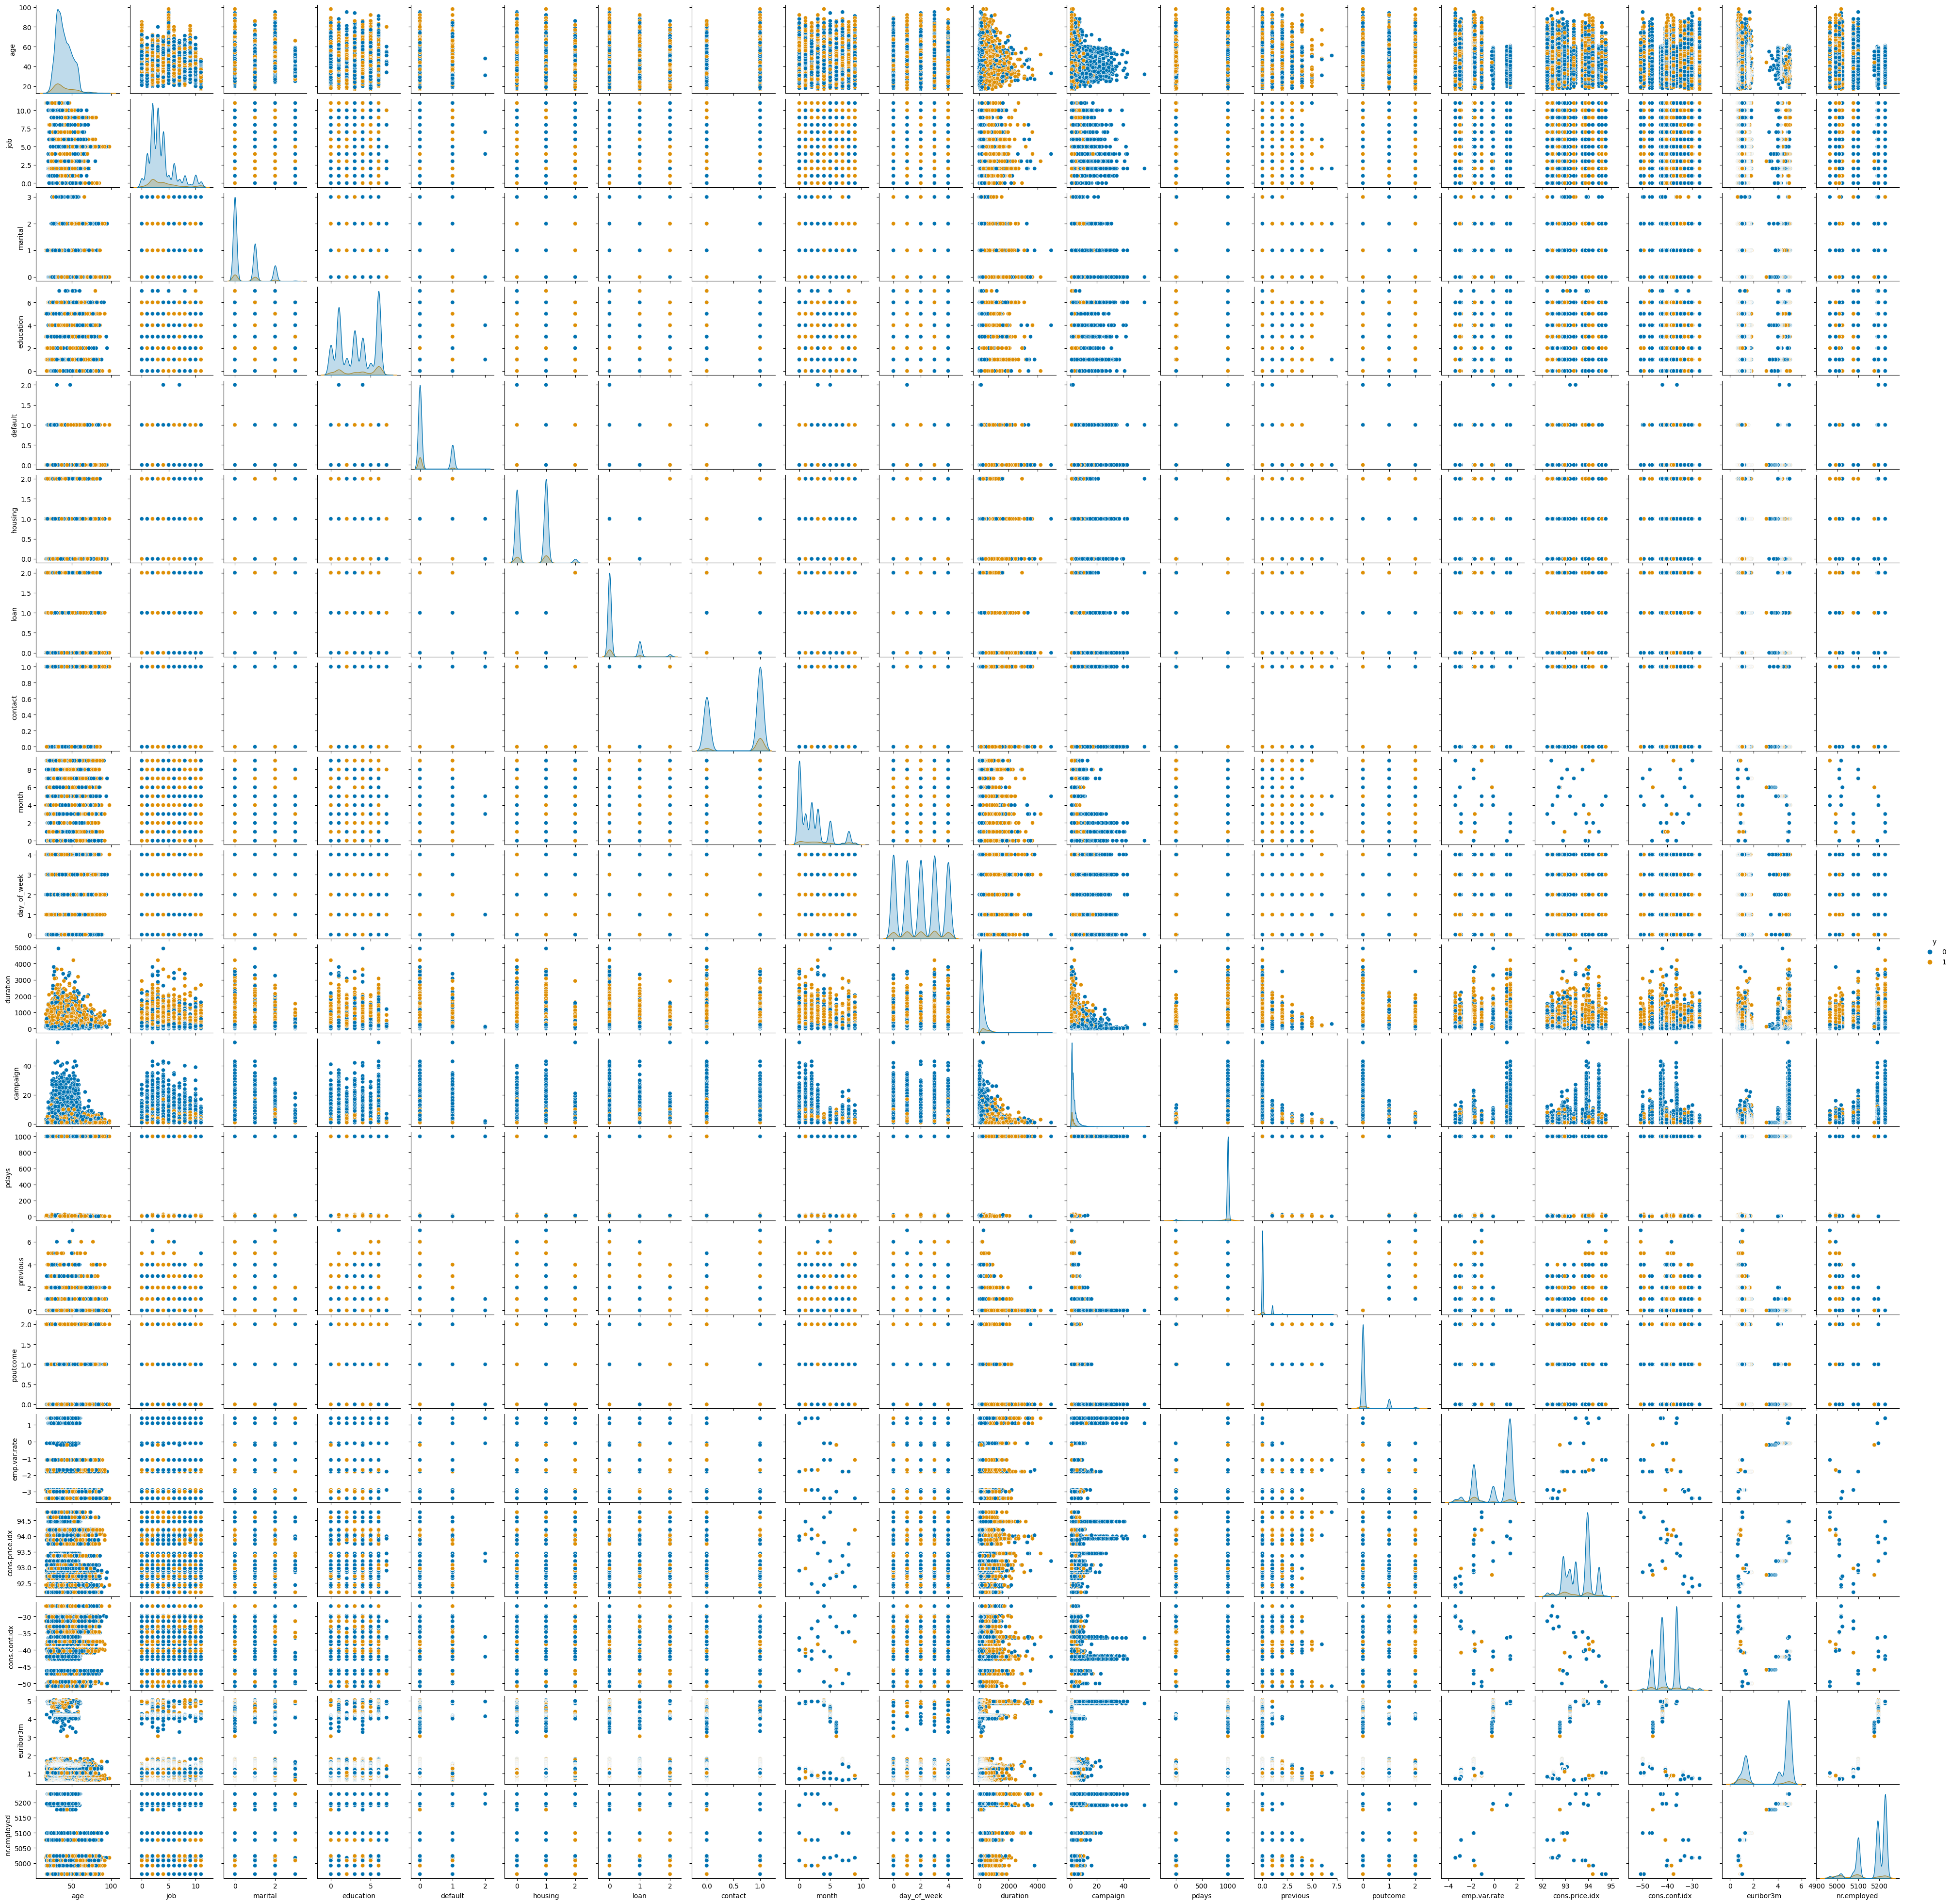

In [ ]:
sns.pairplot(df_mapped, hue="y", height = 2, palette = 'colorblind');

Revisando la diagonal principal del pairplot resultante se observa la homogeneidad de la distribución de las clases a predecir en torno a cada una de las variables independientes. Se comprueba una vez más que no se trata de un dataset, y posterior modelo, sencillo para predecir si un cliente va a contratar o no el producto bancario.

* La variable *duration* es una de las pocas donde se aprecia cierta separación de las dos categorías a predecir. Si bien la mayoría de los datos se encuentran muy cercanos a datos pequeños, se observa como existe una cola de la clase positiva que tiende a duraciones mayores.

* En el caso de las variables relacionadas a la tasa de empleo del país *nr.employed y emp.var.rate* se presenta un comportamiento similar como era de esperarse, en donde se nota un número importante de compra del producto ofrecido cuando baja y existe decrecimiento en la tasa de empleados de Portugal.

* Por último, se puede observar como en la fila y columna asociada con la variable 'campaign' existe una tendencia de resultados negativos a valores altos. Esto refleja como el cliente se vuelve más renuente a adquirir el producto mientras es contactado un mayor número de ocasiones.  

#### **Consideración de eliminación de variables no significativas para la predicción**
De acuerdo al contexto del problema y a lo determinado en el análisis de variables y exploratorio del dataset se procederá a **eliminar la variable *duration* del dataset** ya que no contribuye a la predicción que un cliente que pueda adquirir un producto financiero sino que aporta información después de que dicho cliente haya decidido contratarlo o no, siendo la variable duration más útil para análisis de eventos pasados pero no relevante para futuras predicciones.




Una de las advertencias de la fuente del dataset tiene que ver con el relleno de la variable pdays con el valor 999 cuando se desconoce o no se tiene registro de la cantidad de días que se tiene del último contacto del cliente fuera de la campaña (*pdays*). Por ello se procede a evaluar:

In [4]:
variables_999 =['pdays']
valores_999 = []
for feature in variables_999:
    if (999 in df[feature].unique()):
        count_val = np.round((df[feature].value_counts()[999]/len(df[feature])),4)*100
        valores_999.append([feature, count_val])
    else:
        pass
pd.DataFrame(valores_999, columns=['Feature', '% Missing'])

Feature  % Missing
0   pdays      96.32

A continuación se procede a analizar el porcentaje de valores únicos de pdays en el dataset, haciendo contraste con la variable a predecir.

In [ ]:
df_var999 = df[['pdays','y']].groupby(by=['y','pdays'])['y'].agg('count').rename('Cantidad').to_frame().sort_values(['y','Cantidad'],ascending=False).reset_index()

df_var999['Porcentaje_valor'] = 0.0

for i in df_var999.y.unique():
  for j in df_var999.pdays[df_var999.y==i]:
    df_var999.loc[df_var999[(df_var999.y==i)&(df_var999.pdays==j)].index,('Porcentaje_valor')] = \
    df_var999.loc[df_var999[(df_var999.y==i)&(df_var999.pdays==j)].index,('Cantidad')]/df_var999.loc[df_var999[(df_var999.y==i)].index,('Cantidad')].sum()*100

#df_var999

dfp = pd.DataFrame(columns=df_var999.pdays.unique(),index=df_var999.y.unique())

for i in dfp.index:
    for j in df_var999.pdays[df_var999.y==i].unique():
        #print(i,j)
        dfp.loc[i,j] = df_var999[(df_var999.y==i)&(df_var999.pdays==j)]['Porcentaje_valor'].values[0]
        #dfp
dfp


999       3         6    ...        26         27          20 
yes  79.1595   6.42241   6.22845  ...  0.0215517  0.0215517         NaN
no   98.5006  0.385794  0.336544  ...        NaN        NaN  0.00273613

[2 rows x 27 columns]

Para la variable pdays se puede apreciar que el 96% de las filas del dataset contienen un valor 999, lo que sería "valor desconocido". En cuanto a la variable a predecir en el caso de resultado positivo se tiene que un 80% de clientes no tiene información de contacto de días anteriores y para clientes con respuesta negativa se tiene un 98% de valores de relleno.

Dadas estas condiciones se concluye que la variable **pdays** no aporta al resultado final de las predicciones por lo que se procede a **eliminarla**.

***NOTA: el eliminado de las variables se ejecutará en la sección de estandarización del dataset, de forma de poder trabajar con la variable duration para futuros análisis***

#### **Definición de variables dummies**
Se exploran los valores únicos de las variables para determinar la trasformación a valores dummies.

In [5]:
dfvar = pd.DataFrame(columns=['Columna','valores','unique_qty'])

for i in enumerate(df.columns):
    #print('COLUMNA',df.columns[i[0]],df[df.columns[i[0]]].unique(),'\n')
    columna = df.columns[i[0]]
    valores = df[df.columns[i[0]]].unique()
    unique_qty = len(df[df.columns[i[0]]].unique())
    values = pd.Series([columna,valores,unique_qty],index=dfvar.columns)
    dfvar = dfvar.append(values,ignore_index=True)

dfvar.sort_values(by='unique_qty')

Columna  ... unique_qty
20               y  ...          2
7          contact  ...          2
4          default  ...          3
5          housing  ...          3
6             loan  ...          3
14        poutcome  ...          3
2          marital  ...          4
9      day_of_week  ...          5
3        education  ...          8
13        previous  ...          8
15    emp.var.rate  ...         10
8            month  ...         10
19     nr.employed  ...         11
1              job  ...         12
16  cons.price.idx  ...         26
17   cons.conf.idx  ...         26
12           pdays  ...         27
11        campaign  ...         42
0              age  ...         78
18       euribor3m  ...        316
10        duration  ...       1544

[21 rows x 3 columns]

Se observa cómo la gran mayoría de las variables indepedientes son de tipo categórica, es por ello que en los próximos pasos se procederá a la creación de variables dummies o *one hot encoder*. De la codificación resultante se elimina una variable para evitar los efectos de multicolinealidad.

In [6]:
df_enc = df.copy()

# Se crean las columnas dummies y se elimina una para evitar la multicolinealidad
contact_dum = pd.get_dummies(df_enc['contact'], prefix = "contact")
contact_dum.drop(contact_dum.columns[0],axis=1,inplace=True)

default_dum = pd.get_dummies(df_enc['default'], prefix = "default")
default_dum.drop(default_dum[['default_unknown']],axis=1,inplace=True)

housing_dum = pd.get_dummies(df_enc['housing'], prefix = "housing")
housing_dum.drop(housing_dum[['housing_unknown']],axis=1,inplace=True)

loan_dum = pd.get_dummies(df_enc['loan'], prefix = "loan")
loan_dum.drop(loan_dum[['loan_unknown']],axis=1,inplace=True)

poutcome_dum = pd.get_dummies(df_enc['poutcome'], prefix = "poutcome")
poutcome_dum.drop(poutcome_dum[['poutcome_nonexistent']],axis=1,inplace=True)

marital_dum = pd.get_dummies(df_enc['marital'], prefix = "marital")
marital_dum.drop(marital_dum[['marital_unknown']],axis=1,inplace=True)

day_of_week_dum = pd.get_dummies(df_enc['day_of_week'], prefix = "day_of_week")
day_of_week_dum.drop(day_of_week_dum.columns[0],axis=1,inplace=True)

education_dum = pd.get_dummies(df_enc['education'], prefix = "education")
education_dum.drop(education_dum.columns[0],axis=1,inplace=True)

previous_dum = pd.get_dummies(df_enc['previous'], prefix = "previous")
previous_dum.drop(previous_dum.columns[0],axis=1,inplace=True)

month_dum = pd.get_dummies(df_enc['month'], prefix = "month")
month_dum.drop(month_dum.columns[0],axis=1,inplace=True)

job_dum = pd.get_dummies(df_enc['job'], prefix = "job")
job_dum.drop(job_dum[['job_unknown']],axis=1,inplace=True)

#Se codifica variable a predecir
df_enc['y'] = np.where(df_enc.y == 'yes',int(1),int(0))

# Se añaden las nuevas variables, ahora como dummies, al dataset
df_enc = pd.concat([df_enc, contact_dum, default_dum, housing_dum, loan_dum, poutcome_dum, marital_dum, day_of_week_dum, education_dum, previous_dum, month_dum, job_dum], axis = 1)
df_enc = df_enc.drop(columns = ['contact', 'default', 'housing','loan', 'poutcome', 'marital', 'day_of_week', 'education', 'previous', 'month', 'job'])
df_enc.head()

age  duration  campaign  ...  job_student  job_technician  job_unemployed
0   56       261         1  ...            0               0               0
1   57       149         1  ...            0               0               0
2   37       226         1  ...            0               0               0
3   40       151         1  ...            0               0               0
4   56       307         1  ...            0               0               0

[5 rows x 60 columns]

#### **Estandarización del Dataset**
Se procede a aplicar la estandarización *StandardScaler* para evitar diferencias de magnitud sólo para las variables continuas ya que las variables categóricas han sido previamente procesadas como variables dummies en donde se tiene una columna por cada categoría y se activa el valor "1" si la línea del dataset corresponde a la categoría.


Luego de estandarizadas las variables continuas, se procede a separar el dataset entre variables independientes **X1** y variable a predecir o dependiente **y1**.

In [7]:
#Se descartan duration y pdays
df_cont = df_enc[['age','campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].copy()

sc_X = StandardScaler()
df_cont_std = pd.DataFrame(sc_X.fit_transform(df_cont),columns = df_cont.columns)

df_std = pd.concat([df_cont_std,df_enc.drop(columns=['age','campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','duration','pdays'])],axis=1)

X1 = df_std.drop(columns='y').to_numpy()
y1 = df_std.y.to_numpy()

df_std

age  campaign  ...  job_technician  job_unemployed
0      1.533143 -0.565963  ...               0               0
1      1.629107 -0.565963  ...               0               0
2     -0.290177 -0.565963  ...               0               0
3     -0.002284 -0.565963  ...               0               0
4      1.533143 -0.565963  ...               0               0
...         ...       ...  ...             ...             ...
41171  3.164534 -0.565963  ...               0               0
41172  0.573501 -0.565963  ...               0               0
41173  1.533143 -0.204990  ...               0               0
41174  0.381573 -0.565963  ...               1               0
41175  3.260499  0.155984  ...               0               0

[41176 rows x 58 columns]

#### **Train/test split. Trabajando con Dataset desbalanceado: Aplicación de SMOTE**
Se aplica SMOTE (Synthetic Minority Oversampling Technique) sólo al set de training debido a que teóricamente no se debe aplicar a los datos de test ya que modificaría la proporción de estos, lo que no sucede en la realidad o al menos en la aplicación al negocio tratada en este proyecto.

De igual forma, como pruebas complementarias para el presente caso de estudio, posteriormente se evaluarán los resultados aplicando SMOTE a todo el dataset y sin aplicarlo. 

In [8]:
#Se identifican las posiciones de las variables categóricas en el DataFrame para aplicar SMOTE
var_cont = len(['age','campaign','pdays','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

cat_position_list = [*range(var_cont,df_std.columns.size-1)]
print(cat_position_list)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 23,stratify=y1)

smote_nc = SMOTENC(random_state=23, categorical_features=cat_position_list)
X_S1, y_S1 = smote_nc.fit_resample(X_train1, y_train1)

#### **Definición de funciones a utilizar en los modelos a aplicar**
En esta sección se definen las funciones de evaluación de métricas para modelos de clasificación. Esto se hace con la finalidad de simplificar y estandarizar las líneas códigos posteriores. Es de notar que debido al desbalance del dataset se agregó la métrica **F1 Score** ya que será clave al medir y optimizar modelos.

In [10]:
# Se crea la función "metricas" para calcular los indicadores de la matríz de confusión.
def metricas (TN, FP, FN, TP):
    Sensibilidad = TP/(TP + FN) if TP + FN != 0  else 1
    Especifidad = TN / (TN + FP) if TN + FP != 0 else 1
    Exactitud = (TP + TN) / (TP + TN + FP + FN) if TP + TN + FP + FN != 0 else 1
    Precision = TP / (TP + FP) if TP + FP != 0 else 1
    f1 = 2*TP / (2*TP + FP + FN) if 2*TP + FP + FN != 0 else 1  
    return Sensibilidad,Especifidad,Precision,Exactitud,f1

# Se crea la función "print_metrics" para calcular los indicadores de la matríz de confusión en distintos umbrales
def print_metrics (probabilidades, y_test, num_tr):

    df_prob = pd.DataFrame(probabilidades)
    df_metricas = pd.DataFrame(columns = [round(x/num_tr,2) for x in range(1, num_tr)], 
                               index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud','F1 Score'])

    for i in range(1,num_tr):
        df_prob['prediction']=np.where(df_prob[0]>i/num_tr,1,0)
        df_prob['actual'] = list(y_test)
        df_prob['actual'] = df_prob['actual'].apply(lambda x: int(x))
        TN, FP, FN, TP = confusion_matrix(df_prob['actual'],df_prob['prediction']).ravel()
        Sensibilidad,Especifidad,Precision,Exactitud,F1 = metricas(TN, FP, FN, TP)
        df_metricas[round(i/num_tr,2)] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                              'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                              'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2),
                                              'F1 Score':round(F1,4)})
    return df_metricas

#Se crea la función plot_model_results para graficar la matriz de confusión de los modelos, curva ROC y mostrar las métricas
def plot_model_results(pred_results=[], model_name=[], figs = (14,10),y_test=[],hspace=0.35, wspace=0.2,div=1):
    dfm = pd.DataFrame(columns = model_name,index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud','F1 Score'])
    if len(pred_results) == 1:
        rows = len(pred_results)
        cols = 2
    else:
        rows = int(2*div)
        cols = int(len(pred_results)/div)        
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figs)
    axes = axes.T.flatten()
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    paleta_completa = [plt.cm.Blues,plt.cm.Greens,plt.cm.Oranges,plt.cm.Purples,plt.cm.Reds,plt.cm.Greys,plt.cm.PuBu,plt.cm.YlOrRd,plt.cm.BuGn]
    paleta = paleta_completa[0:len(pred_results)]
    colores_completos = ['blue','green','orange','purple','red','grey','cyan','pink','seagreen']
    colores = colores_completos[0:len(pred_results)]
    k = 0
    for i,j in enumerate(pred_results):
        ax = axes[k]
        k+=1
        TN, FP, FN, TP = confusion_matrix(y_test[i],j, labels=[0,1]).ravel()
        sns.heatmap([[TN, FP],[FN, TP]], annot=True,cmap=paleta[i], fmt='g',ax=ax)
        ax.set_ylabel('Valores verdaderos')
        ax.set_xlabel('Valores predichos')
        ax.set_title('Matriz de Confusión '+model_name[i])
        ax = axes[k]
        k+=1
        fpr, tpr, thresholds = roc_curve(y_test[i], j)
        auc = roc_auc_score(y_test[i], j)
        ax.set_xlabel('FPR = 1-Especifidad')
        ax.set_ylabel('TPR = Sensibilidad')
        ax.plot(fpr, tpr, label="AUC "+model_name[i]+" = "+str(round(auc,4)),color=colores[i])
        ax.plot([0,1], [0,1], 'k--', color='grey')
        ax.set_title('Curva ROC '+model_name[i])
        ax.legend(loc='lower right')
        Sensibilidad,Especifidad,Precision,Exactitud, F1 = metricas (TN, FP, FN, TP)
        dfm[model_name[i]] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                        'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                        'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2),'F1 Score':round(F1,2)})
    plt.show()
    return dfm          
  
#Función Recall (para aplicar como métrica en Redes Neuronales)
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Función precisión (para aplicar como métrica en Redes Neuronales)
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#Función F1 (para aplicar como métrica en Redes Neuronales)
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### **Redes Neuronales**

Se aplicará un **modelo secuencial** de Redes Neuronales Artificiales conectadas por la clase *Dense*, utilizando la Biblioteca *Keras* que tendrá las siguientes **características fijas**:
* ***Dos (2)* capas ocultas**, las cuales se eligieron en base a las experiencias consultadas al trabajar el presente dataset y en el Technical Report de Cybenko (1988) que establece que dos capas ocultas son suficientes para redes neuronales con valores continuos.
* **Inicializador de pesos con Kernel *uniforme***
* Función de activación **rectificador lineal unitario en las capas ocultas**, para que los pesos que no tengan relevancia se descarten y los pesos continuos que tengan relevancia puedan obtener un valor que además le proporcione un factor de escala o relevancia.
* Función de activación **sigmoide para capa de salida**, la cual es bastante ajustable a problemas de clasificación binaria.
* **Función de pérdida/función de costo binary_crossentropy** para el ajuste de los pesos durante el backpropagation de las redes neuronales dado que el problema en cuestión es de clasificación binaria y dicha función busca que los pesos sean relevantes para proveer la mayor cantidad de información posible a la predicción.
* **F1-Score como métrica** para determinar el performance del modelo, ya que el foco del modelo es determinar los clientes que contratarán el producto bancario por lo que se prioriza la identificación de positivos y el F1-Score es la media armónica entre la precisión y recall (sensibilidad), métricas que están relacionadas con la identificación de valores positivos.
* **Optimizador Adam**, el cuál es un algoritmo de optimización del error por gradiente descendiente.

Las **características a variar** para el ajuste de la red neuronal serán las siguientes:
* **Dropout**: técnica de regularización en los modelos de redes neuronales en la que las neuronas de una capa son aleatoriamente descartadas durante la fase de entrenamiento. Se variará la probabilidad de dropout en las capas ocultas.
* **Epoch**, que es el número de iteraciones de propagación hacia adelante y hacia atrás de la red neuronal para el ajuste de los pesos.
* **Batch_size**, que sería la cantidad de datos por iteración de *forward-propagation* y *back-propagation*, de manera de no ejecutar una iteración por fila de datos sino por grupos.
* **Número de neuronas en capas ocultas**, de manera de probar el performance de la red con distinta cantidad de neuronas.

Se prodece a definir el clasificador de Redes Neuronales con los parámetros fijos y variables ya mencionados:


In [11]:
X_S1.shape

(51152, 57)

In [13]:
#Redes Neuronales
def build_classifier(optimizer, dropout1,dropout2,neuron1,neuron2):
    #Se inicializa la ANN
    classifier = Sequential()
    #Se añaden las capas de entrada y primera capa oculta
    classifier.add(Dense(units = neuron1, kernel_initializer = "uniform", activation = "relu", input_dim = 57))
    classifier.add(Dropout(dropout1))
    #Se añade la segunda capa oculta
    classifier.add(Dense(units = neuron2, kernel_initializer = "uniform",  activation = "relu"))
    classifier.add(Dropout(dropout2))
    #Se añade la capa de salida
    classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
    # Se compila la ANN
    classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics=[f1_m])
    #Retornar el clasificador
    return classifier

Para determinar los mejores hiperparámetros se ejecutará un GridSearch:

In [ ]:
#Grid Search ANN1
seed(23)
tf.random.set_seed(23)
parameters = {
    'batch_size' : [10,25,32],
    'nb_epoch' : [50,100,150], 
    'optimizer' : ['adam'],
    'dropout1' : [0,0.1,0.2,0.3],
    'dropout2' : [0,0.1,0.2,0.3],
    'neuron1' : [20,29,39],
    'neuron2': [20,29,39]
}

folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 23)

classifier_ANN1 = KerasClassifier(build_fn = build_classifier)

grid_search = GridSearchCV(estimator = classifier_ANN1, 
                           param_grid = parameters,
                           scoring = 'f1', 
                           cv = skf.split(X_S1, y_S1),
                           verbose = 1,
                           n_jobs =-1)
seed(23)
tf.random.set_seed(23)   
#grid_search = grid_search.fit(X_S1, y_S1)
#best_parameters = grid_search.best_params_
#best_score = grid_search.best_score_
#print(best_parameters)
#print(best_score)

***NOTA: La ejecución duró alrededor de 4 horas, se deja el código de fit de GridSearch comentado de modo que si se desea probar nuevamente sólo se debe borrar el comentario, a continuación se muestran los resultados obtenidos***

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits<br>
Epoch 1/1 51152/51152 [==============================] - 9s 173us/step - loss: 0.4487 - acc: 0.7904 - f1_m: 0.7617 - precision_m: 0.8095 - recall_m: 0.7592<br>
**best_parameters = {'batch_size': 10, 'dropout1': 0.1, 'dropout2': 0.1, 'nb_epoch': 50, 'neuron1': 39, 'neuron2': 39, 'optimizer': 'adam'}**
<br> 
**best_score = 0.8127504283701781**

Se aplican estos valores obtenidos y optimizados al set de training para el fit de la red.

In [ ]:
ArtificialNeuralaNetwork_1 = build_classifier(optimizer='adam',dropout1=0.1,dropout2=0.1,neuron1=39,neuron2=39)
seed(23)
tf.random.set_seed(23)                           
ArtificialNeuralaNetwork_1.fit(X_S1, y_S1, batch_size = 10, epochs = 50)

Epoch 1/50
5117/5117 [==============================] - 8s 1ms/step - loss: 0.4760 - f1_m: 0.7441
Epoch 2/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.4005 - f1_m: 0.7975
Epoch 3/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3868 - f1_m: 0.8054
Epoch 4/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3707 - f1_m: 0.8145
Epoch 5/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3605 - f1_m: 0.8268
Epoch 6/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3548 - f1_m: 0.8242
Epoch 7/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3497 - f1_m: 0.8300
Epoch 8/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3445 - f1_m: 0.8322
Epoch 9/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3387 - f1_m: 0.8376
Epoch 10/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3360 - f1_m: 0.8369
Epoch 11/50
5117/51

Se imprimen las métricas para distintos umbrales de decisión:

In [ ]:
y_pred  = ArtificialNeuralaNetwork_1.predict(X_test1)
df_metricas_ANN1 = print_metrics(y_pred,y_test1,20)
df_metricas_ANN1

0.05      0.10  ...        0.90        0.95
TP            1181.0000  1046.000  ...    222.0000    131.0000
FN             211.0000   346.000  ...   1170.0000   1261.0000
FP            6723.0000  4751.000  ...    210.0000    117.0000
TN            4242.0000  6214.000  ...  10755.0000  10848.0000
Sensibilidad     0.8500     0.750  ...      0.1600      0.0900
Especifidad      0.3900     0.570  ...      0.9800      0.9900
Precision        0.1500     0.180  ...      0.5100      0.5300
Exactitud        0.4400     0.590  ...      0.8900      0.8900
F1 Score         0.2541     0.291  ...      0.2434      0.1598

[9 rows x 19 columns]

Se elige el umbral de 0.35 porque es el que resuta mayor valor de F1-Score. Si se compara con el valor por defecto de la matriz de confusión que es 0.5, se puede decir que se pierde un 5% de precisión pero se gana un 10% de sensibilidad, disminuyéndose así los Falsos Negativos.


Se aplica el umbral mencionado y se imprime la matriz de confusión y métricas:

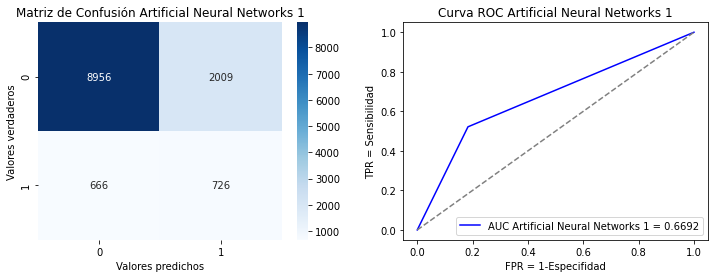

TP     FN  ...  Exactitud  F1 Score
Artificial Neural Networks 1  726.0  666.0  ...       0.78      0.35

[1 rows x 9 columns]

In [ ]:
predictions_ANN1=np.where(y_pred>0.35,1,0)
results_ANN1 = plot_model_results(pred_results=[predictions_ANN1], model_name=["Artificial Neural Networks 1"], figs = (12,4),y_test=[y_test1])
results_ANN1.transpose()


En el contexto del problema, al ajustar el umbral se disminuyó la cantidad de personas con gran posibilidad de contratar un producto bancario pero según el modelo no lo contratarían ya que caerían en la categoría "0". En el test del modelo se tuvo que 666 personas que contratarían quedaron por fuera del grupo de contacto principal, representando un **48% de pérdida de clientes potenciales** a contratar el producto.

El ajuste ocasionó que los falsos positivos aumentaran pero en el caso práctico no importaría **llamar a alrededor de 2700 (2009+726) personas y obtener un éxito del 25%** si se compara con el dataset original donde se obtiene un poco más del 10% de éxito en 40000 llamadas.

Con respecto a las métricas de **Especifidad y Exactitud** se encuentran en un muy cercano a **0.8** lo cual es un valor aceptable. Se tiene además un área bajo la curva ROC **AUC de 0.6692**, y una naturaleza en la misma en la cual se puede observar que valores altos de identificación de positivos implican tasas altas de identificación de negativos por lo que mandatoriamente hay que **"sacrificar" alguna métrica en el modelo**.

En este caso particular se escogió dejar un valor alto de especifidad, para identificar los **verdaderos negativos y poder descartarlos** del contacto para adquisición del producto, y de esta manera **priorizar al grupo identificado como positivos donde se tiene una tasa aceptable de éxito (25%)** con respecto a los resultados de los datos originales.



#### **AdaBoost**
Se aplicarán para este proyecto dos modelos de ensamblaje. Partiremos con el Adaboost para posteriormente aplicar un XGBoost con el objetivo de buscar mejorar aún más las predicciones. 

In [ ]:
# Se aplica el Adaboost y se realiza el acondicionamiento de los parámetros
classifier_AdaBoost = AdaBoostClassifier(random_state=23)
classifier_AdaBoost.fit(X_S1, y_S1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=23)

Se arma el grid de parámetros para acondicionar el modelo de *Adaboost*

In [ ]:
parametros = [{'n_estimators': [20,50,100,200,300,500,1000,2000,3000],
               'learning_rate' : [0.001,0.01,0.1,0.2,0.5]}] 

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 23)

grid_search = RandomizedSearchCV(classifier_AdaBoost,
                           param_distributions = parametros,
                           scoring = 'f1',
                           n_jobs= -1,
                           random_state=23,
                           verbose = 5,
                           cv=skf.split(X_S1, y_S1))

#grid_search = grid_search.fit(X_S1, y_S1)
#best_f1 = grid_search.best_score_
#best_parameters = grid_search.best_params_

#print('F1_Score: ',best_f1)
#print('Best Parameters: ',best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 48.7min finished


F1_Score:  0.8737145218769504
Best Parameters:  {'n_estimators': 3000, 'learning_rate': 0.2}


***NOTA: La ejecución duró alrededor de 50 minutos, se deja el código de fit de GridSearch comentado de modo que si se desea probar nuevamente sólo se debe borrar el comentario, a continuación se muestran los resultados obtenidos***


Fitting 5 folds for each of 10 candidates, totalling 50 fits<br>
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.<br>
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 22.4min<br>
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 48.7min finished<br>
**F1_Score:  0.8737145218769504**<br>
**Best Parameters:  {'n_estimators': 3000, 'learning_rate': 0.2}**

Se aplican estos parámetros y se entrena con los dataset de training.

In [ ]:
# Modelo Adaboost con los mejores parámetros obtenidos
ada_clf = AdaBoostClassifier(learning_rate=0.2, n_estimators=3000)
ada_clf.fit(X_S1, y_S1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=3000, random_state=None)

Finalmente se predice la variable *Y* con este modelo y se visualizan los resultados.

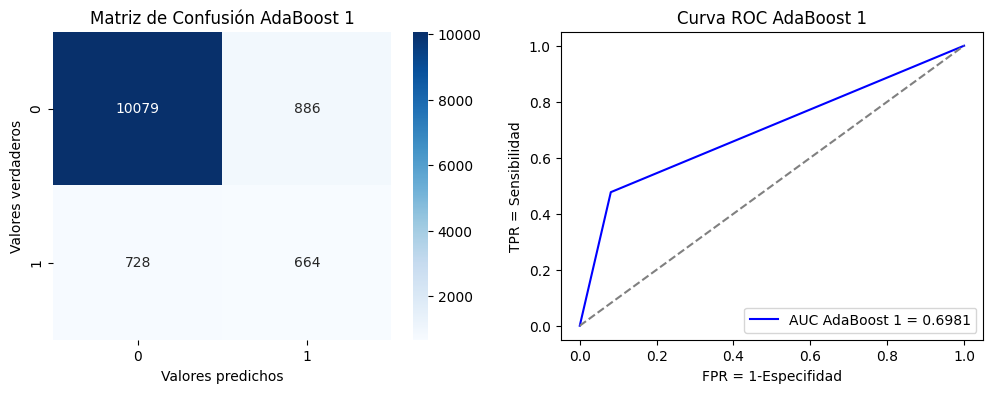

TP     FN     FP  ...  Precision  Exactitud  F1 Score
AdaBoost 1  664.0  728.0  886.0  ...       0.43       0.87      0.45

[1 rows x 9 columns]

In [ ]:
predictions_ADA1 = ada_clf.predict(X_test1)
results_ADA1 = plot_model_results(pred_results=[predictions_ADA1], model_name=["AdaBoost 1"], figs = (12,4),y_test=[y_test1])
results_ADA1.transpose()

Se puede dilucidar que el desempeño de este modelo a pesar de mejorar los resultados obtenidos de la red neuronal, aún no llega a valores de AUC mayores de 0.7 y F1 Score de más de 0.5. Si se observa a la matriz de confusión en detalle se evidencia como el modelo fue capaz de predecir en términos satisfactorios los valores **negativos** y es por ello el alto valor de la Especificidad. Sin embargo, al momento de revisar el caso de los **positivos** sólo fueron identificados de manera correcta 664 lo que conlleva a una Sensibilidad por debajo de 0.48. 

Si se aplicara este modelo al contexto del negocio y se contactara sólo los 1550 identificados como **compradores** se hubiese tenido un éxito en torno al **43%** lo cual demuestra una mejoría sustancial con el arreglo de red neuronal que había obtenido un **25%**. Se continuará con el estudio del modelo XGBoost con el objetivo de encontrar un modelo mejor.

#### **XGBoost**

Ahora, se procede a aplicar el modelo de XGBoost y acondicionar los hiperparámetros más importantes para así tratar de hallar un modelo óptimo. 

In [ ]:
# Se aplica el XGboost y se realiza el acondicionamiento de los parámetros
xgb = XGBClassifier( n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8],
        'learning_rate' : [0.001,0.01,0.1,0.2,0.3]
        }

folds = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 23)

random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1', n_jobs=-1, cv=skf.split(X_train1, y_train1), verbose=3, random_state=23)

#random_search.fit(X_train1, y_train1)

#print(random_search.best_params_)
#print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


{'subsample': 0.6, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 1.5}
0.38366009654521027


***NOTA: La ejecución duró alrededor de 5 minutos, se deja el código de fit de GridSearch comentado de modo que si se desea probar nuevamente sólo se debe borrar el comentario, a continuación se muestran los resultados obtenidos***

Fitting 5 folds for each of 10 candidates, totalling 50 fits<br>
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.<br>
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.1min<br>
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished<br>
**{'subsample': 0.6, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 1}**<br>
**0.38366009654521027**

Se construye un nuevo modelo con estos mejores parámetros resultantes del grid_search aplicado.

In [ ]:
# Modelo XGboost con los mejoes parámetros obtenidos
xgb_clf = XGBClassifier(subsample=0.6, max_depth=8, gamma=1, learning_rate=0.01)

xgb_clf.fit(X_S1, y_S1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

Finalmente se predicen los resultados con el set de entrenamiento y se grafican los resultados obtenidos.

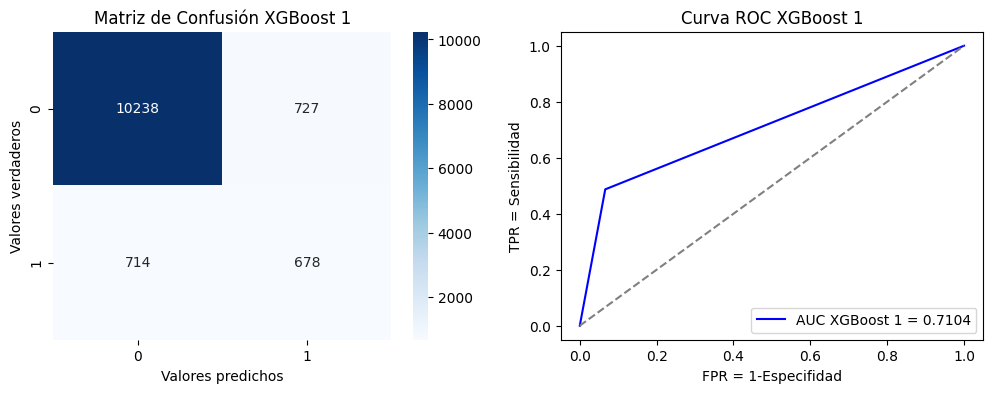

TP     FN     FP  ...  Precision  Exactitud  F1 Score
XGBoost 1  678.0  714.0  727.0  ...       0.48       0.88      0.48

[1 rows x 9 columns]

In [ ]:
predictions_XGB1 = xgb_clf.predict(X_test1)
results_XGB1 = plot_model_results(pred_results=[predictions_XGB1], model_name=["XGBoost 1"], figs = (12,4),y_test=[y_test1])
results_XGB1.transpose()

Los resultados mostrados en la matriz confusión muestran una **mejoría clara** de este modelo con respecto a las redes neuronales y **levemente superior** al Adaboost. El número de predicciones verdaderas fue superior tanto para positivos y negativos. Sin embargo, se observa como el modelo aún no es capaz de ofrecer resultados satisfactorios para los clientes que adquieren el producto. Si bien la posibilidad de éxito de las llamadas incrementaría a más del **48%** es un valor que podría quedar corto para las expectativas del negocio.

Tanto el **F1 score** como el **AUC** de la curva ROC mejoraron. En el caso del F1 score, se tiene que se logró aumentar en un **3%** respecto al Adaboost y más de **12%** a la red. 

#### **Comparación de métricas de modelos**

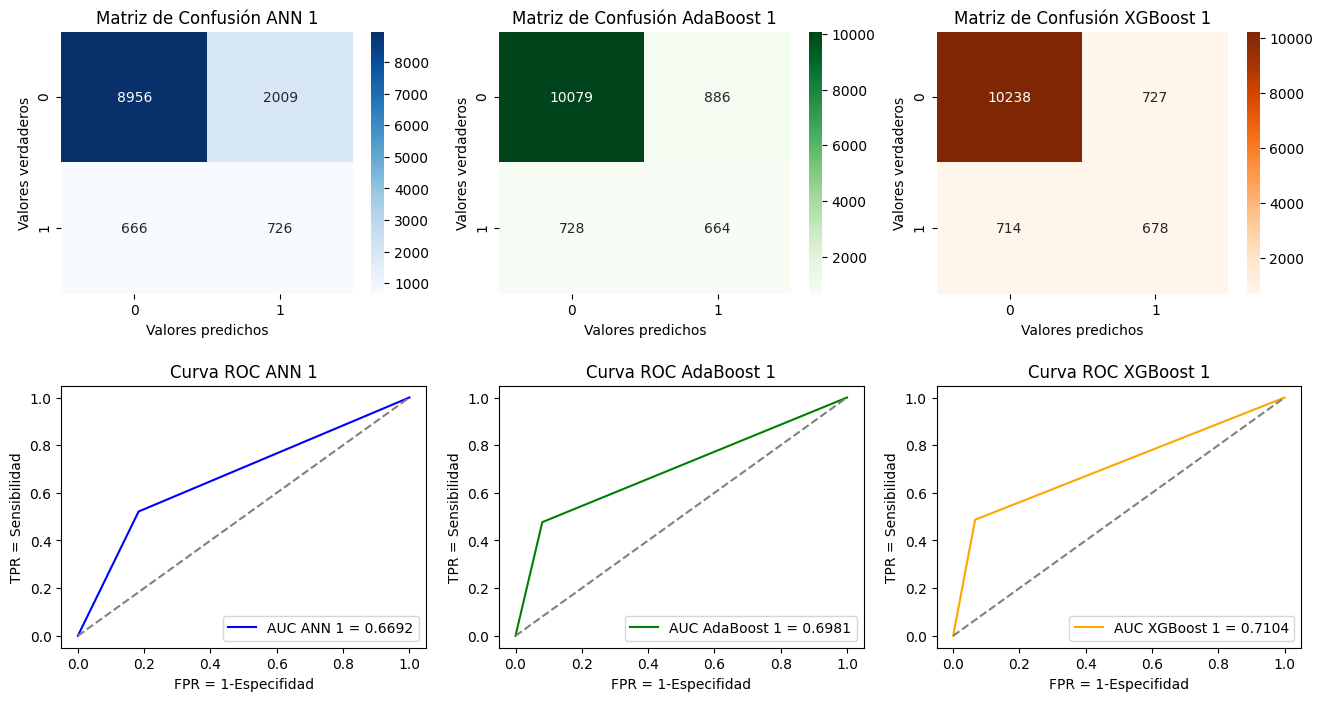

TP     FN      FP  ...  Precision  Exactitud  F1 Score
ANN 1       726.0  666.0  2009.0  ...       0.27       0.78      0.35
AdaBoost 1  664.0  728.0   886.0  ...       0.43       0.87      0.45
XGBoost 1   678.0  714.0   727.0  ...       0.48       0.88      0.48

[3 rows x 9 columns]

In [ ]:
results_All1 = plot_model_results(pred_results=[predictions_ANN1,predictions_ADA1,predictions_XGB1], 
                                  model_name=["ANN 1","AdaBoost 1","XGBoost 1"], 
                                  figs = (16,8),y_test=[y_test1,y_test1,y_test1])
results_All1.transpose()

#### **Análisis finales y conclusiones**
* Esta visualización final se presenta para poder ofrecer un panorama completo del desempeño de los modelos aplicados. Se evidencia de manera más clara como el área bajo la curva ROC aumenta desde la **ANN** hasta el **XGBoost** y con ello también lo hace el F1 Score. 

* En caso de tener que aplicar el presente caso de estudio al negocio se debería seleccionar el modelo **XGBoost** dejando claro que aún siendo el más adecuado no logre superar un F1 Score de 0.5 y mantiene una Sensibilidad baja. 

* Los resultados obtenidos en cuanto a métricas van de la mano con el reto planteado por un dataset severamente desbalanceado en la variable a predecir y con carencia de variables independientes que logren una separacíon adecuada de las clase target, tal como se vió durante el análisis exploratorio. 

* En el desarrollo de los cursos de Machine Learning y en especial en este proyecto se pudo aprender la importancia, en términos de **tiempo y resultados**, de una comprensión adecuada del negocio y de un análisis exploratorio univariado y multivariado que permitan la selección de estrategias y modelos para abordarlos.

* En el contexto de **costo computacional** se logró evidenciar que el modelo **XGBoost** además de ofrecer mejores métricas resultantes, tuvo un costo computacional bajo en la búsqueda de hiperparámetros y en el fit del modelo con respecto a los otros modelos. En el caso de AdaBoost se tuvo que esperar casi 1 hora para 50 fits, comparado con los 5 minutos del XGBoost. En el caso de las ANN se tuvo que esperar alrededor de 4 horas para compilar el GridSearch no sólo por la naturaleza iterativa del modelo sino por la gran cantidad de parámetros que se pueden variar para el ajuste del modelo.

* Adicional a las exigencias del caso de estudio, se sumó a este notebook **dos apéndices** que se consideraron de extrema importancia para entender mejor el problema y el modelo escogido. El **primer apéndice** demuestra la importancia de la aplicación del **SMOTE** al dataset.

* Durante el **segundo apéndice** se muestran los resultados para el caso de no eliminar la **variable duration** en donde el modelo mejora significativamente aunque esto no refeje una situación real para el negocio.

#### **Apéndice 1. Resultados con otras formas de utilizar el SMOTE**

Tal como se comentó y justificó durante el desarrolo del modelo final presentado, fue necesaria la aplicación de un oversampling **(SMOTE)** para la correcta aplicación y optimización de los resultados finales. Debido a la importancia de poder manejar el desbalance del dataset, se presentan las **iteraciones adicionales** que fueron necesarias durante la investigación para poder mejorar el performance del modelo sobre circunstancias reales. 

* Caso 1: SMOTE al set de training (Caso final y analizado anteriormente)
* Caso 2: Aplicando SMOTE a todo el set de datos. Es decir, se ejecuta la predicción con un X_test balanceado por SMOTE.
* Caso 3: Sin aplicar SMOTE, por lo que se entrena y predice el modelo con los datos originales.

In [ ]:
#Caso 1. Ya aplicado, donde se aplica SMOTE solo al train

#*********************CASO 2*****************************
#Caso 2. Aplicando SMOTE a todo el Dataset y haciendo el test con el X_test con SMOTE
var_cont_s = len(['age','campaign','pdays','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
cat_position_list_2 = [*range(var_cont_s,df_std.columns.size-1)]
smote_nc_1 = SMOTENC(random_state=23, categorical_features=cat_position_list_2)
X_Smote_2, y_Smote_2 = smote_nc_1.fit_resample(X1, y1)
X_train_S2, X_test_S2, y_train_S2, y_test_S2 = train_test_split(X_Smote_2, y_Smote_2, test_size = 0.3, random_state = 23,stratify=y_Smote_2)

#Redes Neuronales
ArtificialNeuralaNetwork_2 = build_classifier(optimizer='adam',dropout1=0.1,dropout2=0.1,neuron1=39,neuron2=39)
seed(23)
tf.random.set_seed(23)                           
ArtificialNeuralaNetwork_2.fit(X_train_S2, y_train_S2, batch_size = 10, epochs = 50)
y_pred_2 = ArtificialNeuralaNetwork_2.predict(X_test_S2)
predictions_ANN_2 = np.where(y_pred_2>0.5,1,0)

#AdaBoost
ada_clf_2 = AdaBoostClassifier(learning_rate=0.2, n_estimators=3000)
ada_clf_2.fit(X_train_S2, y_train_S2)
predictions_ADA_2 = ada_clf_2.predict(X_test_S2)

#XGBoost
xgb_clf_2 = XGBClassifier(subsample=0.6, max_depth=8, gamma=1, learning_rate=0.01)
xgb_clf_2.fit(X_train_S2, y_train_S2)
predictions_XGB_2 = xgb_clf_2.predict(X_test_S2)
#*********************FIN CASO 2*****************************

#*********************CASO 3*****************************
#Caso 3. Sin aplicar SMOTE
ArtificialNeuralaNetwork_3 = build_classifier(optimizer='adam',dropout1=0.1,dropout2=0.1,neuron1=39,neuron2=39)
seed(23)
tf.random.set_seed(23) 
ArtificialNeuralaNetwork_3.fit(X_train1, y_train1, batch_size = 10, epochs = 50)
y_pred_3 = ArtificialNeuralaNetwork_3.predict(X_test1)
predictions_ANN_3 = np.where(y_pred_3>0.5,1,0)

#AdaBoost
ada_clf_3 = AdaBoostClassifier(learning_rate=0.2, n_estimators=3000)
ada_clf_3.fit(X_train1, y_train1)
predictions_ADA_3 = ada_clf_3.predict(X_test1)

#XGBoost
xgb_clf_3 = XGBClassifier(subsample=0.6, max_depth=8, gamma=1, learning_rate=0.01)
xgb_clf_3.fit(X_train1, y_train1)
predictions_XGB_3 = xgb_clf_3.predict(X_test1)
#*********************FIN CASO 3*****************************

Epoch 1/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.4932 - f1_m: 0.7360
Epoch 2/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.4197 - f1_m: 0.7824
Epoch 3/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.4080 - f1_m: 0.7884
Epoch 4/50
5117/5117 [==============================] - 8s 1ms/step - loss: 0.3987 - f1_m: 0.7986
Epoch 5/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.3865 - f1_m: 0.8053
Epoch 6/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.3872 - f1_m: 0.8070
Epoch 7/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.3737 - f1_m: 0.8138
Epoch 8/50
5117/5117 [==============================] - 8s 1ms/step - loss: 0.3733 - f1_m: 0.8113
Epoch 9/50
5117/5117 [==============================] - 7s 1ms/step - loss: 0.3739 - f1_m: 0.8087
Epoch 10/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.3646 - f1_m: 0.8186
Epoch 11/50
5117/51

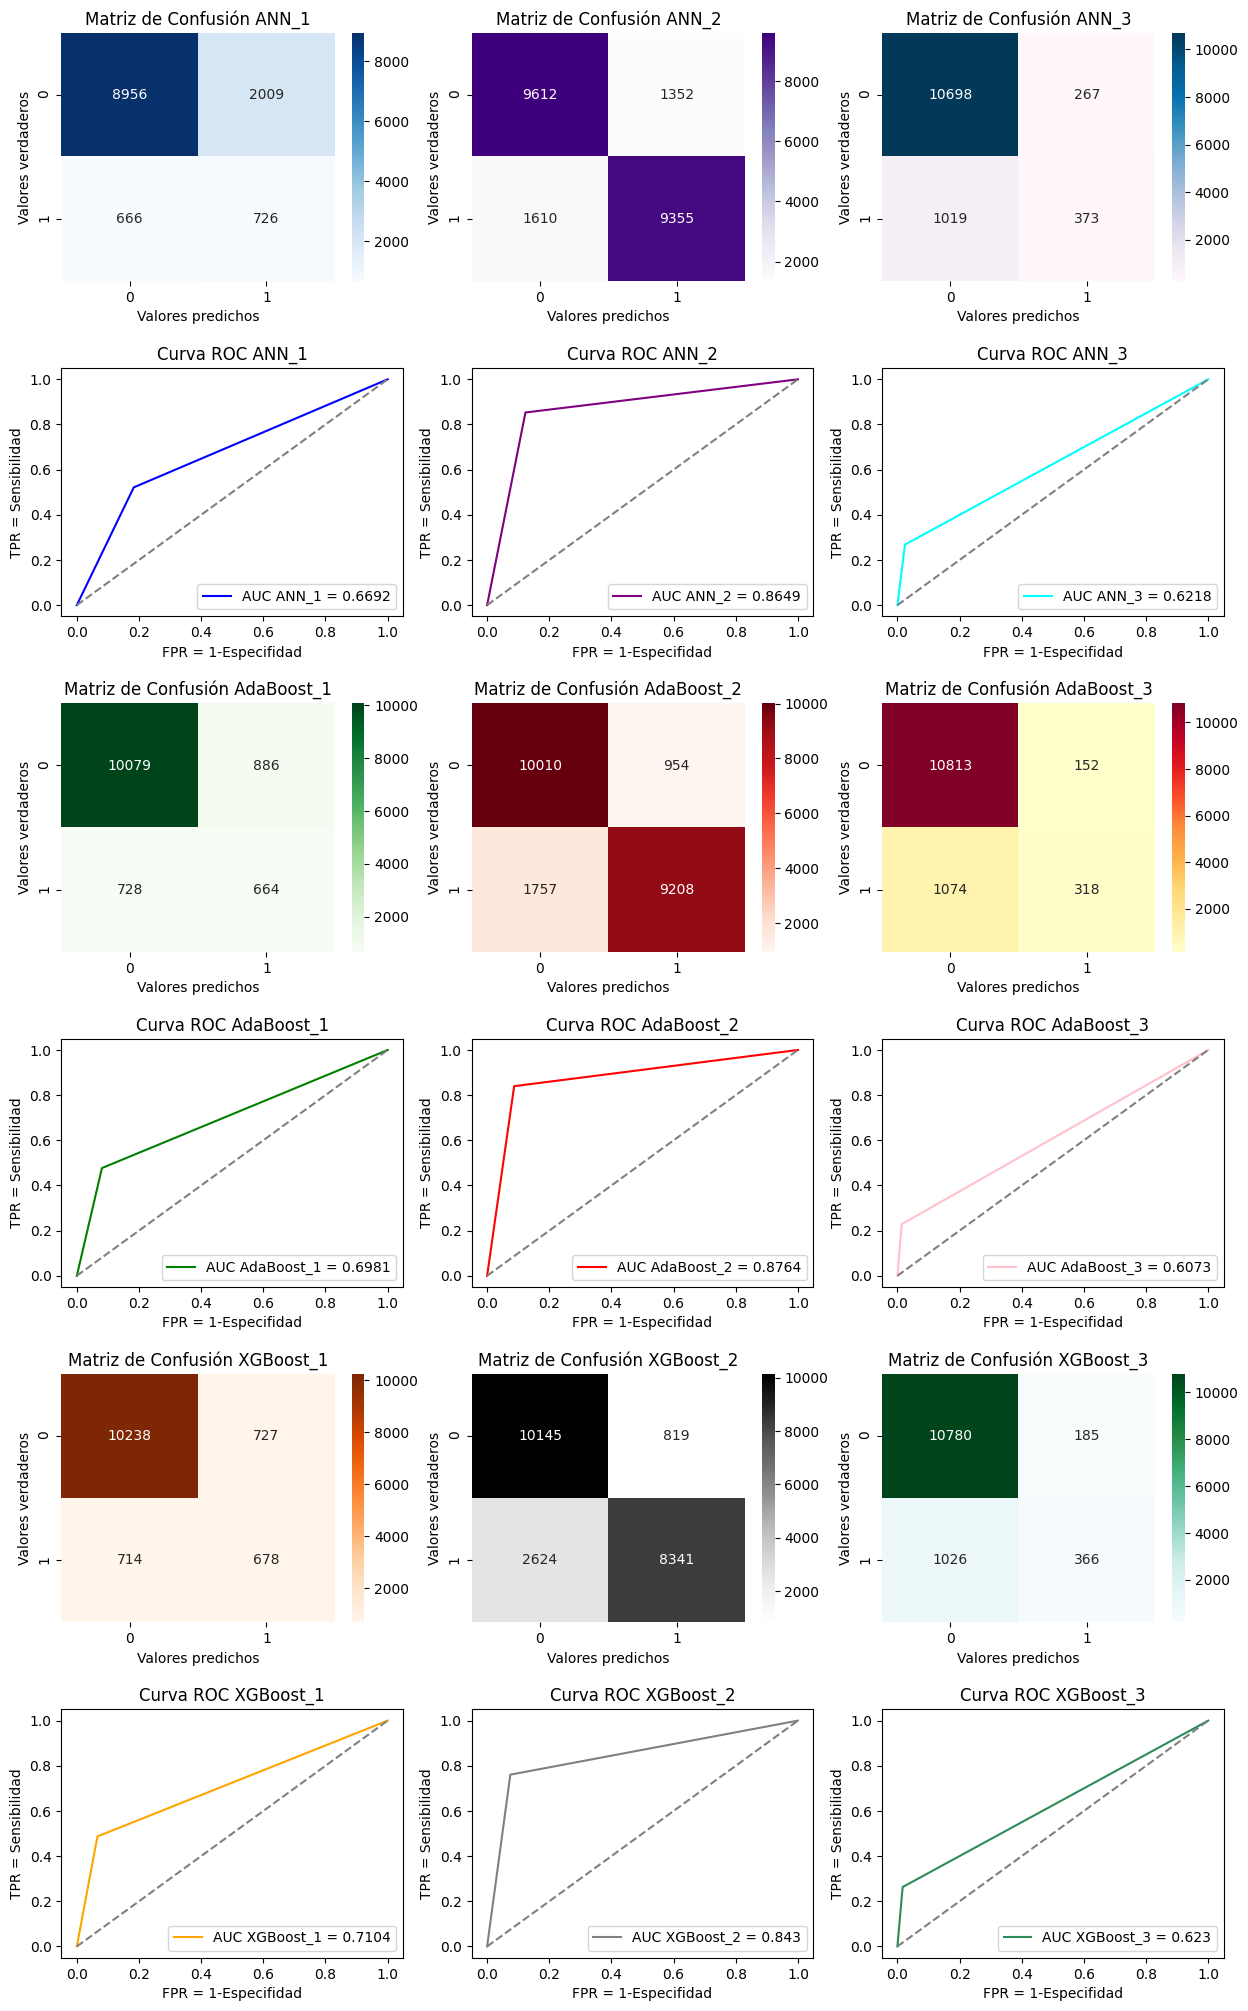

TP      FN      FP  ...  Precision  Exactitud  F1 Score
ANN_1        726.0   666.0  2009.0  ...       0.27       0.78      0.35
AdaBoost_1   664.0   728.0   886.0  ...       0.43       0.87      0.45
XGBoost_1    678.0   714.0   727.0  ...       0.48       0.88      0.48
ANN_2       9355.0  1610.0  1352.0  ...       0.87       0.86      0.86
AdaBoost_2  9208.0  1757.0   954.0  ...       0.91       0.88      0.87
XGBoost_2   8341.0  2624.0   819.0  ...       0.91       0.84      0.83
ANN_3        373.0  1019.0   267.0  ...       0.58       0.90      0.37
AdaBoost_3   318.0  1074.0   152.0  ...       0.68       0.90      0.34
XGBoost_3    366.0  1026.0   185.0  ...       0.66       0.90      0.38

[9 rows x 9 columns]

In [ ]:
results_SMOTES = plot_model_results(pred_results=[predictions_ANN1,predictions_ADA1,predictions_XGB1,
                                                  predictions_ANN_2,predictions_ADA_2,predictions_XGB_2,
                                                  predictions_ANN_3,predictions_ADA_3,predictions_XGB_3], 
                                  model_name=["ANN_1","AdaBoost_1","XGBoost_1","ANN_2","AdaBoost_2","XGBoost_2","ANN_3","AdaBoost_3","XGBoost_3"], 
                                  figs = (15,25),y_test=[y_test1,y_test1,y_test1,y_test_S2,y_test_S2,y_test_S2,y_test1,y_test1,y_test1],div=3)
results_SMOTES.transpose()

La comparación de estos modelos refleja la importancia no sólo de un proceso de tratamiento para el desbalance de la variable target sino de uno adecuado tal como se hizo. 

* Se observa como el **caso 3** (Sin SMOTE) presentó los peores resultados en prácticamente todas las métricas y de manera muy clara. La métrica de Sensibilidad no alcanza el 0.3 para ningún caso. Esto refleja la dificultad de los modelos para predecir la clase minoritaria.

* El **caso 2** pareciera a primera vista el gran ganador y solución final para esta investigación. Sin embargo, estos resultados provienen de un set de test que fue modificado por el SMOTE y que en la **aplicación real** al negocio resulta imposible. Presentar estas métricas y arreglo como solución sería errado.

#### **Apéndice 2. Resultados si se hubiese utilizado la variable duration**

Finalmente y a modo de ilustración se van a mostrar los resultados correspondientes a los modelos tomando en consideración la variable que **duration** la cual fue eliminada de manera justificada en secciones anteriores.

In [ ]:
#Se descartan duration y pdays
#Estandarizacion
df_cont_dur = df_enc[['age','campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','duration']].copy()
sc_X_dur = StandardScaler()
df_cont_std_dur = pd.DataFrame(sc_X_dur.fit_transform(df_cont_dur),columns = df_cont_dur.columns)
df_std_dur = pd.concat([df_cont_std_dur,df_enc.drop(columns=['age','campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','duration','pdays'])],axis=1)

#Definicion X e y
X_dur = df_std_dur.drop(columns='y').to_numpy()
y_dur = df_std_dur.y.to_numpy()

#Train/test split y SMOTE
var_cont = len(['age','campaign','pdays','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','duration'])
cat_position_list_dur = [*range(var_cont,df_std_dur.columns.size-1)]
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_dur, y_dur, test_size = 0.3, random_state = 23,stratify=y_dur)
smote_nc_dur = SMOTENC(random_state=23, categorical_features=cat_position_list_dur)
X_Smote_dur, y_Smote_dur = smote_nc_dur.fit_resample(X_train_dur, y_train_dur)

#Redes Neuronales
def build_classifier_dur(optimizer, dropout1,dropout2,neuron1,neuron2):
    # Inicializar la RNA
    classifier = Sequential()
    # Añadir las capas de entrada y primera capa oculta
    classifier.add(Dense(units = neuron1, kernel_initializer = "uniform", activation = "relu", input_dim = 58))
    classifier.add(Dropout(dropout1))
    # Añadir la segunda capa oculta
    classifier.add(Dense(units = neuron2, kernel_initializer = "uniform",  activation = "relu"))
    classifier.add(Dropout(dropout2))
    # Añadir la capa de salida
    classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
    # Compilar la RNA
    classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics=[f1_m])
    # Devolver el clasificador
    return classifier

ArtificialNeuralaNetwork_dur = build_classifier_dur(optimizer='adam',dropout1=0.1,dropout2=0.1,neuron1=39,neuron2=39)
seed(23)
tf.random.set_seed(23)                           
ArtificialNeuralaNetwork_dur.fit(X_Smote_dur, y_Smote_dur, batch_size = 10, epochs = 50)
y_pred_dur = ArtificialNeuralaNetwork_dur.predict(X_test_dur)
predictions_ANN_dur = np.where(y_pred_dur>0.5,1,0)

#AdaBoost
ada_clf_dur = AdaBoostClassifier(learning_rate=0.2, n_estimators=3000)
ada_clf_dur.fit(X_Smote_dur, y_Smote_dur)
predictions_ADA_dur = ada_clf_dur.predict(X_test_dur)

#XGBoost
xgb_clf_dur = XGBClassifier(subsample=0.6, max_depth=8, gamma=1, learning_rate=0.01)
xgb_clf_dur.fit(X_Smote_dur, y_Smote_dur)
predictions_XGB_dur = xgb_clf_dur.predict(X_test_dur)

Epoch 1/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.2857 - f1_m: 0.8837
Epoch 2/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.2073 - f1_m: 0.9117
Epoch 3/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.1946 - f1_m: 0.9155
Epoch 4/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.1871 - f1_m: 0.9202
Epoch 5/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.1803 - f1_m: 0.9242
Epoch 6/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.1727 - f1_m: 0.9264
Epoch 7/50
5117/5117 [==============================] - 9s 2ms/step - loss: 0.1723 - f1_m: 0.9270
Epoch 8/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.1678 - f1_m: 0.9288
Epoch 9/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.1668 - f1_m: 0.9285
Epoch 10/50
5117/5117 [==============================] - 8s 2ms/step - loss: 0.1652 - f1_m: 0.9279
Epoch 11/50
5117/51

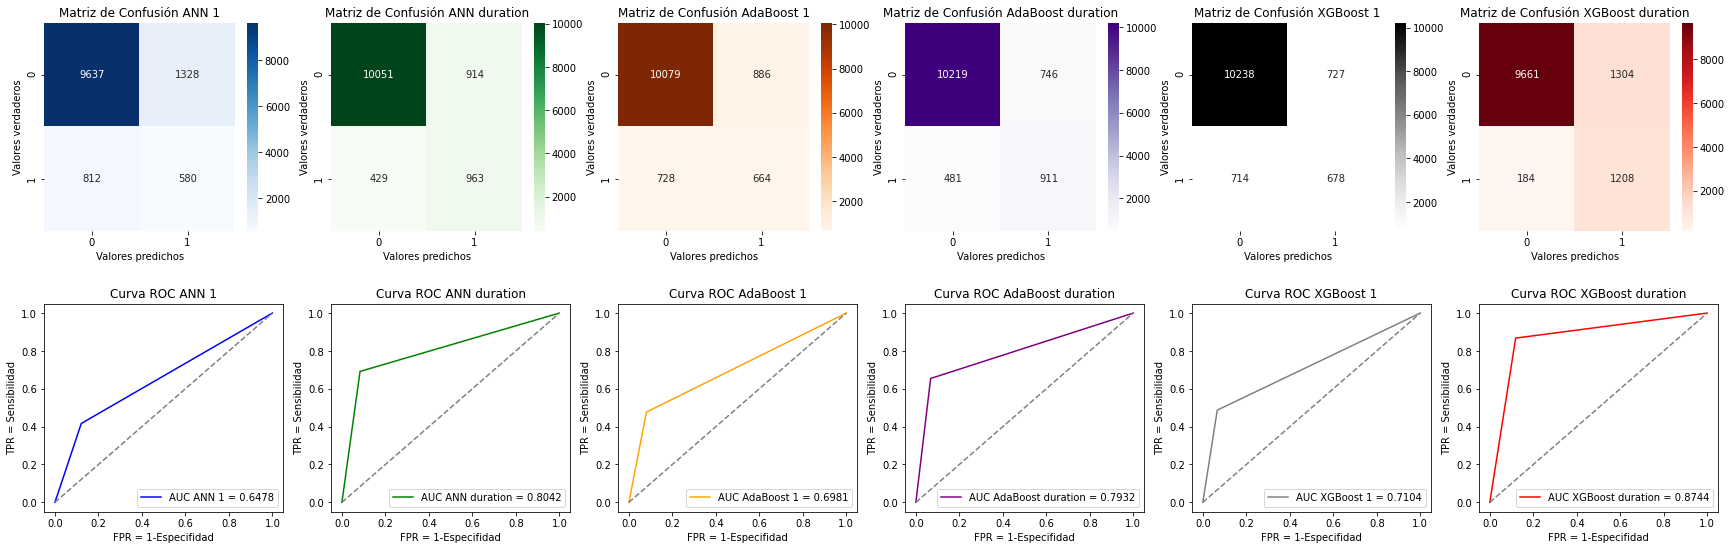

ANN 1  ANN duration  ...  XGBoost 1  XGBoost duration
TP             580.00        963.00  ...     678.00           1208.00
FN             812.00        429.00  ...     714.00            184.00
FP            1328.00        914.00  ...     727.00           1304.00
TN            9637.00      10051.00  ...   10238.00           9661.00
Sensibilidad     0.42          0.69  ...       0.49              0.87
Especifidad      0.88          0.92  ...       0.93              0.88
Precision        0.30          0.51  ...       0.48              0.48
Exactitud        0.83          0.89  ...       0.88              0.88
F1 Score         0.35          0.59  ...       0.48              0.62

[9 rows x 6 columns]

In [ ]:
results_All1_dur = plot_model_results(pred_results=[predictions_ANN1,predictions_ANN_dur,predictions_ADA1,predictions_ADA_dur,predictions_XGB1,predictions_XGB_dur], 
                                  model_name=["ANN 1","ANN duration","AdaBoost 1","AdaBoost duration","XGBoost 1","XGBoost duration"], 
                                  figs = (30,9),y_test=[y_test1,y_test_dur,y_test1,y_test_dur,y_test1,y_test_dur])
results_All1_dur

Estos resultados y comparaciones añadiendo la variable **duration** a los modelos demuestra efectivamente cómo este atributo era clave a la hora de separar las decisiones de compra. El mejor modelo para este caso logra un AUC de la curva ROC de más de **0.87** y un F1 Score de **0.62**. Es decir, los modelos logran obtener métricas satisfactorias y muy superiores a las que no consideran la variable **duration**. Este caso práctico no se consideró ya que el objetivo final es mejorar las acciones de marketing a través de la **predicción** de la respuesta del cliente, y esta variable se obtiene sólo una vez finalizada la llamada.

Por otro lado, refleja el buen comportamiento de los modelos y la obtención de cifras cercanas, y en muchos casos, mejores que diferentes publicaciones y retos de la web Kaggle.